# Mining from Retail and Media Data Sets

## Part 1: Clustering the Online Retails Data

### Task 1. Data Preparation for Clustering.
#### 1. Can you identify data quality issues in this dataset such as unusual data types, missing values, etc?

In [1]:
# Import modules
import pandas as pd
import numpy as np

# Load in dataset
df=pd.read_csv('online_shoppers_intention.csv')

In [2]:
# Cursory investigation
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

`VisitorType` and `Month` are type `object` and should be investigated further and transformed to a numeric type that supporst clustering.

In [3]:
# Checking VisitorType
print(df['VisitorType'].value_counts())

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


`VisitorType` should ideally be a boolean of
0. `New_Visitor`
1. `Returning_Visitor`

However the value `Other` appears.

In [4]:
# Investigate Other
df.loc[df['VisitorType'] == 'Other'].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.000000,85.000000,85.000000,85.000000
mean,1.470588,62.695588,0.176471,11.685490,12.470588,570.404862,0.038551,0.063349,18.191812,0.0,5.823529,8.894118,6.882353,13.682353
std,2.509924,203.904742,0.693103,59.794791,26.111295,1264.152488,0.078438,0.071112,53.174567,0.0,2.920276,5.291556,3.099200,8.249404
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000667,0.000000,0.0,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,29.500000,0.000000,0.011111,0.000000,0.0,2.000000,2.000000,4.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,5.000000,136.500000,0.000000,0.033333,0.000000,0.0,8.000000,13.000000,9.000000,20.000000
75%,3.000000,54.500000,0.000000,0.000000,15.000000,537.625000,0.000000,0.100000,0.000000,0.0,8.000000,13.000000,9.000000,20.000000
max,14.000000,1652.000000,4.000000,410.500000,222.000000,9630.209524,0.200000,0.200000,360.953384,0.0,8.000000,13.000000,9.000000,20.000000


In [5]:
df.loc[df['VisitorType'] != 'Other'].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000
mean,2.323686,81.032732,0.506255,34.664982,31.897964,1200.384922,0.022038,0.042861,5.803858,0.061854,2.098326,2.311719,3.121437,4.002858
std,3.327031,176.661037,1.273520,141.214189,44.562983,1917.440374,0.048139,0.048308,18.075511,0.199540,0.825893,1.574388,2.375767,3.898928
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,187.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,603.707143,0.003175,0.025088,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.850000,0.000000,0.000000,38.000000,1473.967424,0.016848,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


The values are not strikingly different or containing erros. `Other` will be included as a third category alongside `New_Visitor` and `Returning_Visitor`, as opposed to tranforming it to binary values.

In [6]:
# Convert VisitorType to numeric data
visitorMap={'Returning_Visitor':0, 'New_Visitor':1, 'Other':2}
df['VisitorType']=df['VisitorType'].map(visitorMap)

print(df['VisitorType'].value_counts())

0    10551
1     1694
2       85
Name: VisitorType, dtype: int64


In [7]:
# Investigate Month
print(df['Month'].value_counts())

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


`Month` is unusual in that one expects all twelve months to appear in this dataset, but both `Jan` and, more unusually, `Apr` are missing. If this is an error, there is no way at this stage to correct for it and we can only convert the column to a numerical form.

In [8]:
# Convert Month to numeric data
monthMap={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8,
           'Nov':11, 'Sep':9, 'Dec':12}
df['Month']=df['Month'].map(monthMap)

print(df['Month'].value_counts())

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64


In [9]:
# Find missing values
print(df.isnull().sum())
df.dropna(axis=0,inplace=True)

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


 From above, we can see `Administrative` `Administrative_Duration`  `Informational` `Informational_Duration` `ProductRelated` `ProductRelated_Duration` contain missing values. The row contains missing value are droped. 

In [10]:
# Find unusual values
for col in df.columns:
    print(df[col].describe(), end='\n\n')

count    12316.000000
mean         2.317798
std          3.322754
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64

count    12316.000000
mean        80.906176
std        176.860432
min         -1.000000
25%          0.000000
50%          8.000000
75%         93.500000
max       3398.750000
Name: Administrative_Duration, dtype: float64

count    12316.000000
mean         0.503979
std          1.270701
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64

count    12316.000000
mean        34.506387
std        140.825479
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64

count    12316.000000
mean        31.763884
std         44.490339
min          0.000000
25%          7.000000
50%         18.000

`Administrative_Duration` ,`Informational_Duration` and `ProductRelated_Duration` contains 33 instances of value -1. This is an impossible value for time spent, which must be non-negative. These values will be dropped.

In [11]:
# Drop unusual values
df=df.replace(-1,np.nan)
df.dropna(axis=0,inplace=True)

Overall, The dataset contains missing value in columns `Administrative` `Administrative_Duration`  `Informational` `Informational_Duration` `ProductRelated` and `ProductRelated_Duration`. Also, columns `Administrative_Duration` ,`Informational_Duration` and `ProductRelated_Duration` contains value -1. Therefore, these noisy data will be dropped  during pre-processing.

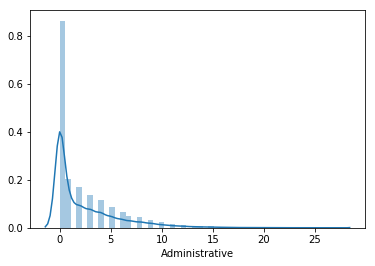

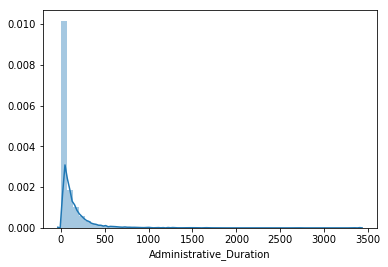

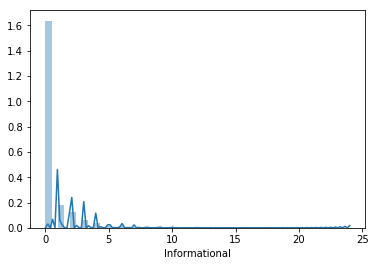

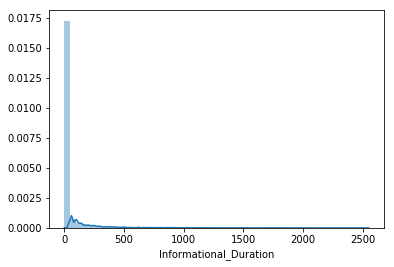

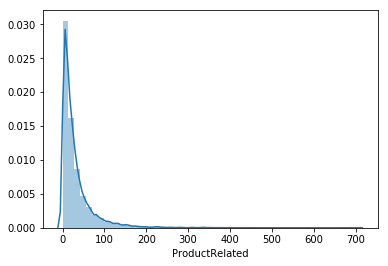

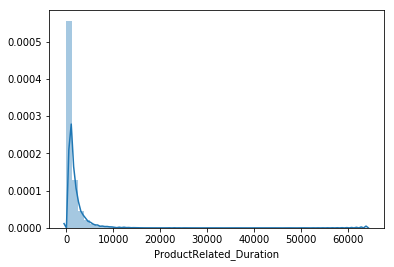

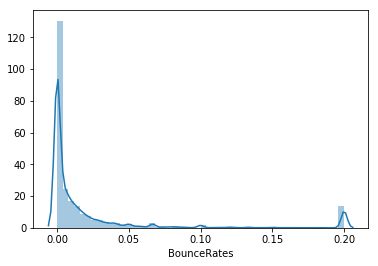

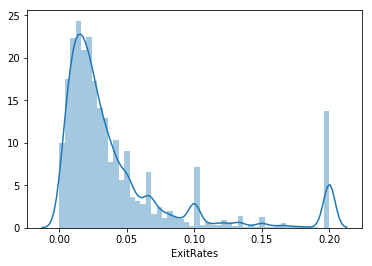

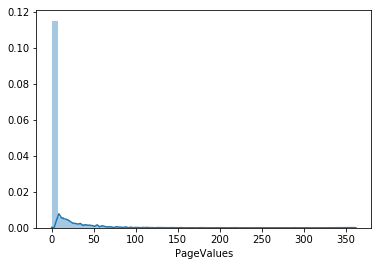

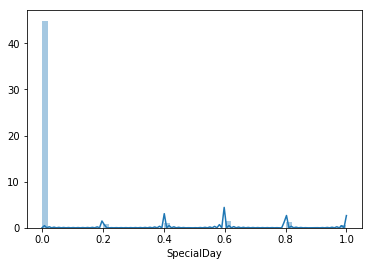

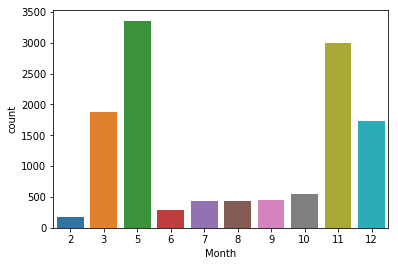

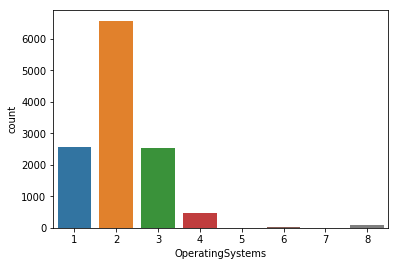

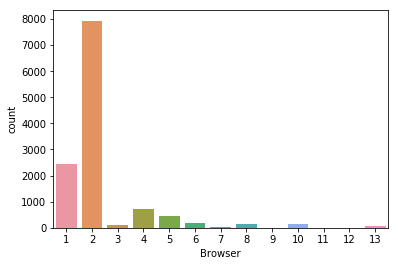

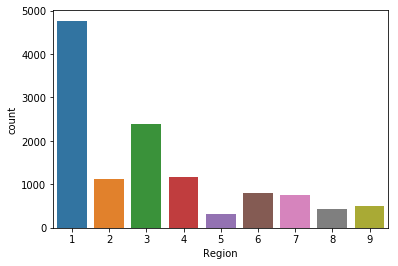

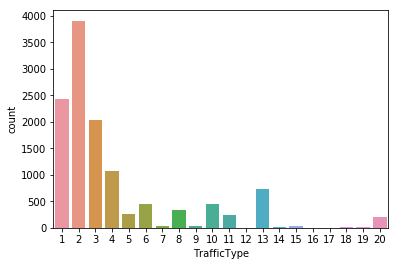

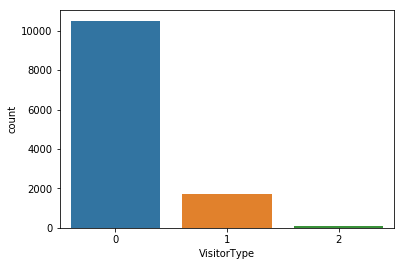

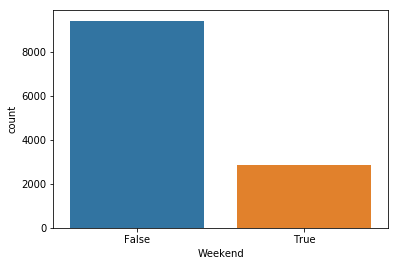

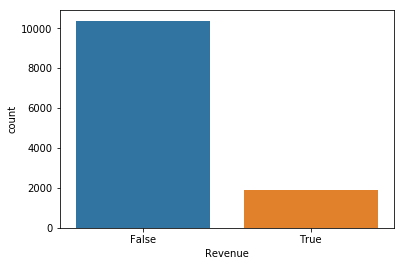

In [13]:
# Import modules
import seaborn as sns
import matplotlib.pyplot as plt

# Seperate numerical and categorical columns
numcolumns=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues','SpecialDay']
catcolumns=['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue']

# Find distribution of all columns
for i in numcolumns:
    dist = sns.distplot(df[i].dropna())
    plt.show()
    
for i in catcolumns:
    sns.countplot(df[i].dropna())
    plt.show()

### Task 2. The first clustering model



####  What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice. Answer this question for each of the tasks 2 and 3.




The company wants to analyize customers based on the time spent on the website. Hence, columns `Administrative_Duration`, `Informational_Duration` and `ProductRelated_Duration` should be included in the analysis.

<table>
<tr>
        <th>Variable</th>
        <th>Role</th>
        <th>Measurement Level</th>
</tr>
<tr>
        <td>Administrative_Duration</td>
        <td>Input</td>
        <td>Interval</td>
</tr>
<tr>
        <td>Informational_Duration</td>
        <td>Input</td>
        <td>Interval</td>
</tr>
<tr>
        <td>ProductRelated_Duration</td>
        <td>Input</td>
        <td>Interval</td>
</tr>
</table>

#### 1. Build a clustering model to profile the customers based on the time they spend on the website. Answer the followings:

#### a. What is the optimal number of clusters?

In [14]:
# Create smaller data frame
df2 = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

# Convert to matrix
X = df2.as_matrix()

/Users/oliver/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [15]:
# Import modules
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define function to find number best number of clusters
def Find_K(X):
    '''
    Generates elbow and silhouette graphs.
    '''
    clusters = []
    inertia_vals = []
    silhouette_scores = []
    # This step is time consuming
    for k in range(2, 15):
        # Train clustering with the specified K
        model = KMeans(n_clusters=k, random_state=42, n_jobs=10)
        model.fit(X)

        # Append model to cluster list
        clusters.append(model)
        inertia_vals.append(model.inertia_)
        silhouette_scores.append(silhouette_score(X, model.predict(X)))
    fig = plt.figure(figsize=(10,3))
    plt.plot(range(2,15), inertia_vals, marker='*')
    plt.show()
    fig = plt.figure(figsize=(10,3))
    plt.plot(range(2,15), silhouette_scores, marker='*')
    plt.show()

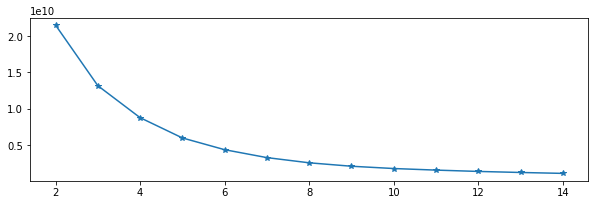

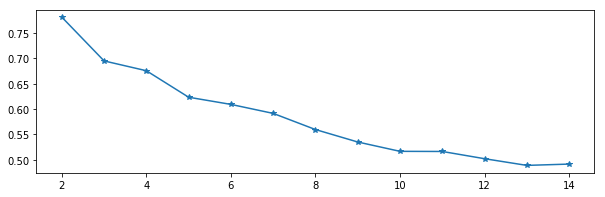

In [17]:
# Determine optimal number of K from elbow method and silhouette (may take a minute)
Find_K(X)

Based on the elbow method, the elbow is somewhere between 3 and 4. The silhouette score indicate 3 is higher than the 4. Therefore the optimal K is set as **3** for clustering.

#### b. For the model with the optimal number of clusters, list the variables that were found important in determining the clusters?

In [16]:
# Define function to assign points by K-means model and display results
def Print_Result(data, k):
    '''
    Trains a K-means modle and display results.
    '''
    # Train model
    model = KMeans(n_clusters=k, random_state= 42)
    model.fit(X)
    
    # Display intra-cluster distance
    print("Sum of intra-cluster distances:", model.inertia_)

    # Display centroid locations
    print("Centroid locations:")
    for centroid in model.cluster_centers_:
        print(centroid)

    # Assign each point to a cluster
    y = model.predict(X)
    df2['Cluster_ID'] = y

    # Display membership of clusters
    print("Cluster membership")
    print(df2['Cluster_ID'].value_counts())

In [17]:
# Train and display cluster results
Print_Result(X, 3)

Sum of intra-cluster distances: 13185315708.802977
Centroid locations:
[  295.36489079   266.72309447 10886.17436548]
[ 62.31560402  20.05480266 579.21493494]
[ 154.87747813   84.67261984 3355.10746367]
Cluster membership
1    10101
2     1975
0      207
Name: Cluster_ID, dtype: int64


/Users/oliver/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/Users/oliver/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/oliver/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


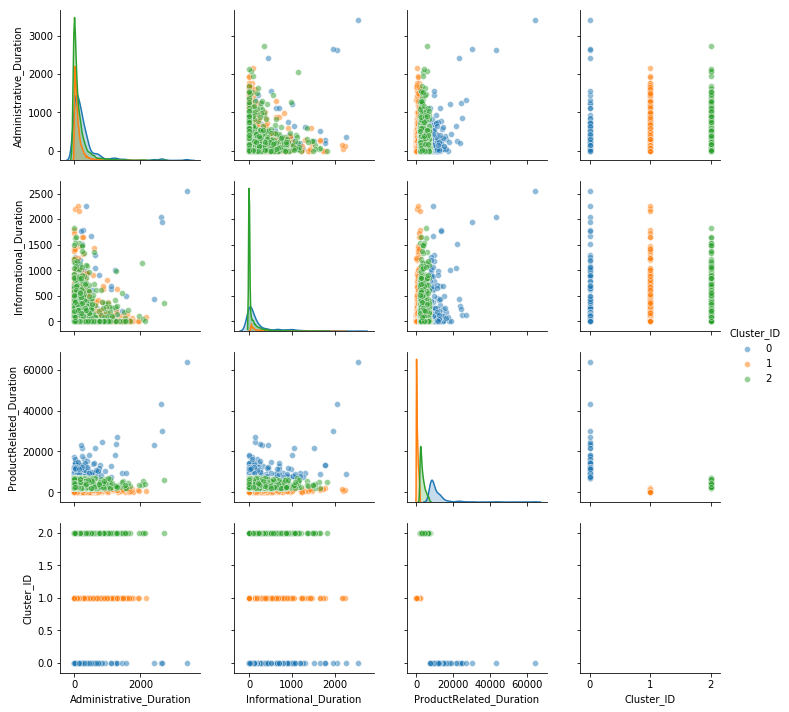

In [18]:
# Show details on clustering --- change to a more clear format
cluster_g = sns.pairplot(df2, hue='Cluster_ID', plot_kws={'alpha': 0.5})

From pairplot, it can be seen that the clusters have different value distributions for each variable. For `ProductRelated_Duration` the distribution of three clusters is  most different. It can be judged this feature contains more information for seperating the three clusters. We therefore determine it is the most important variable.

#### c. Explain the cluster results.

From above `Print_Result` generated plots, we can get outcomes including:

- `Sum of intra-cluster distance`: 13185315708.802977. 
Intra-cluster distance is used to interpret the similarity of objects in the same cluster. We expect a smaller value for a better model.
    
- `Cluster membership`: Cluster 1 is a largest user group, which is 10101. cluster 0 is a smallest user group, it only contains
 207 costumers.

- `Centroid locations`: is the centroid of each cluster.

#### 2. What is the effect of using the standardization method on the model above? Does the variable normalization process enable a better clustering solution?

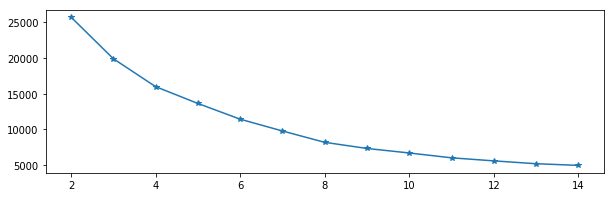

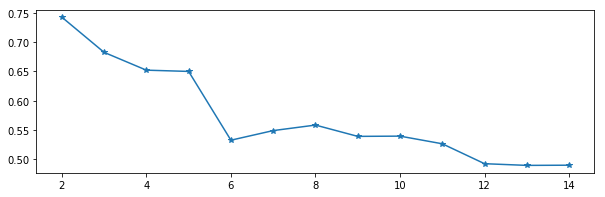

In [19]:
# Import module
from sklearn.preprocessing import StandardScaler

# Apply standardisation
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train clustering model and display elbow plot and silhouette
Find_K(X)

Based on elbow method, the elbow is somewhere between 3 and 4. The silhouette score indicates 4 is the highest, Therefore the optimal K is set as **4** for clustering.

The best K increases to 4 after StandardScaler.

Sum of intra-cluster distances: 15977.745988263705
Centroid locations:
[1.00200756 6.60942417 1.82687722]
[-0.19562398 -0.15352375 -0.25208058]
[0.31234399 0.32442787 2.09538688]
[3.76799805 0.24041249 0.49584508]
Cluster membership
1    10657
2     1024
3      420
0      182
Name: Cluster_ID, dtype: int64


/Users/oliver/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/oliver/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/oliver/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


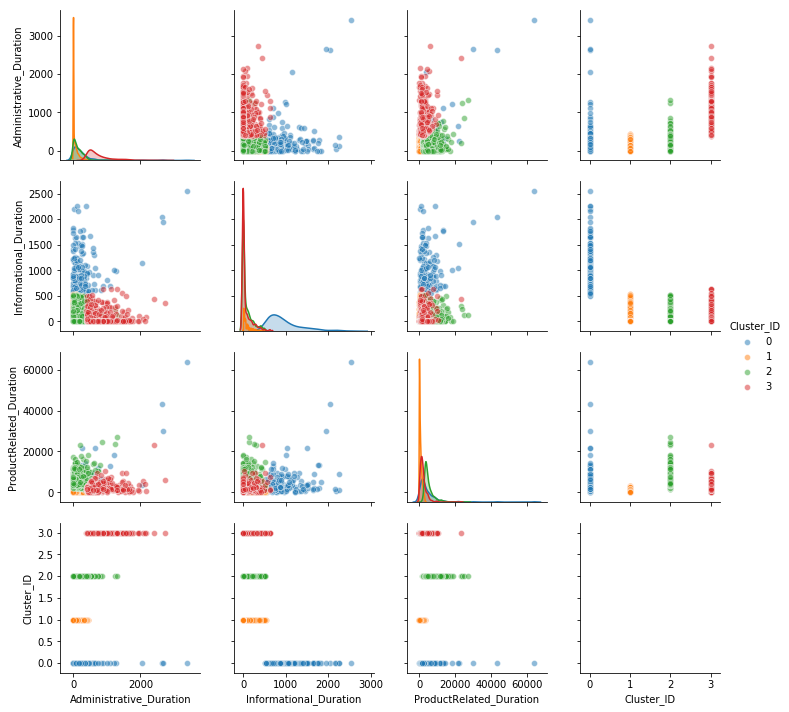

In [20]:
# Train and display clustering results
Print_Result(X,4)

# Make graphic
cluster_g = sns.pairplot(df2, hue='Cluster_ID', plot_kws={'alpha': 0.5})

After scaling the data, The `Sum of intra-cluster distance` decreases significantly. We also get a more cohesive clustering result. In plotting, the distribution of clusters become further differentiated. Therefore, standardization greatly improve the clustering model. This is because clustering algorithms may be sensitive to the distribution of variables.

#### 3. Interpret the cluster analysis outcome. In other words, characterize the nature of each cluster by giving it a descriptive label and a brief description.

- cluster 0 (new user): This group may new to the website, they spend a higher amount of time on informational pages and also peruse the product related pages and also the administrative ones. They may visit all these pages to understand the website or set up and account.

- cluster 1 (bouncers): These users may be just passing by the website quickly or in a targetted way, without spending very much time on it. They spend especially little time on product related pages.

- cluster 2 (shoppers): This group likes online shopping, they spend a lot of time on the product related pages, and one can expect they are interested in making purchases. 

- cluster 3 (managers): This group spends little time product related pages and isntead spendsmore time than any other group on administrative pages.

### Task 3. Refining the clustering model

#### 1. Add more information such as where the users come from and when they access the website, to the clustering analysis that you have conducted in the previous task. Answer the followings:

####  What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice. Answer this question for each of the tasks 2 and 3.





In task 3, the company wants to know its customers in-depth and would like to include information such as where the users come from and when they access the website. Most of the other columns may be hepful in this regard, so we add all excluding `Browser`and `Operating System`, because theses features are unrelated to the analysis.

<table>
<tr>
        <th>Variable</th>
        <th>Role</th>
        <th>Measurement Level Set</th>
</tr>
<tr>
        <td>Administrative</td>
        <td>Input</td>
        <td>Integer</td>
</tr>
<tr>
        <td>Informational</td>
        <td>Input</td>
        <td>Integer</td>
</tr>
<tr>
        <td>ProductRelated</td>
        <td>Input</td>
        <td>Integer</td>
</tr>
<tr>
        <td>Administrative_Duration</td>
        <td>Input</td>
        <td>Interval</td>
</tr>

<tr>
        <td>Informational_Duration</td>
        <td>Input</td>
        <td>Interval</td>
</tr>
<tr>
        <td>ProductRelated_Duration</td>
        <td>Input</td>
        <td>Interval</td>
</tr>
<tr>
        <td>BounceRates </td>
        <td>Input</td>
        <td>Unit Interval</td>
</tr>
<tr>
        <td>ExitRates  </td>
        <td>Input</td>
        <td>Unit Interval</td>
</tr>
<tr>
        <td>PageValues   </td>
        <td>Input</td>
        <td>Interval</td>
</tr>
<tr>
        <td>SpecialDay   </td>
        <td>Input</td>
        <td>Unit Interval</td>
</tr>
<tr>
        <td>Month    </td>
        <td>Input</td>
        <td>Ordinal </td>
</tr>
<tr>
        <td>Region     </td>
        <td>Input</td>
        <td>Nominal </td>

</tr>
<tr>
        <td>TrafficType    </td>
        <td>Input</td>
        <td>Nominal</td>
</tr>
<tr>
        <td>VisitorType     </td>
        <td>Input</td>
        <td>Nominal</td>
</tr>
<tr>
        <td>Weekend      </td>
        <td>Input</td>
        <td>Binary</td>
</tr>
<tr>
        <td>Revenue       </td>
        <td>Input</td>
        <td>Binary</td>
</tr>



</table>

#### a. What is the optimal number of clusters?

In [21]:
# Add other columns
df2=df.drop(['Browser','OperatingSystems'],axis=1)
print(df2['Weekend'].unique())
print(df2['Revenue'].unique())

# Use binary mapping
binMap={True:1,False:0}
df2['Weekend']=df2['Weekend'].map(binMap)
df2['Revenue']=df2['Revenue'].map(binMap)

[False  True]
[False  True]


/Users/oliver/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


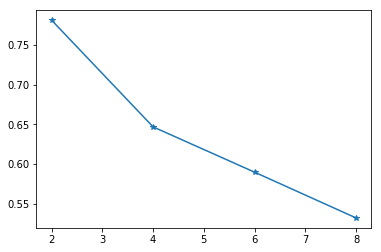

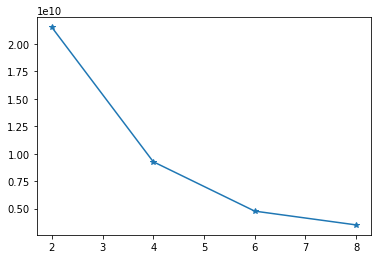

In [29]:
# Import modules
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes

# Convert to matrix
X=df2.as_matrix()

# Define functions
def Optimal_K(X):
    '''
    Finds and displays the elbow method and silhouette.
    '''
    silhouette_scores=[]
    inertia_vals = []
    for i in range(2,10,2):
        model=KPrototypes(n_clusters=i, init='Huang') # n_cluster is the parameter to set the number of clusters.
        y=model.fit_predict(X, categorical=[9,10,11,12,13,14,15]) # Here categorical should be set with the indices of categorical variables. In this dataset, workclass is the only categorical variable. Note: Index starts with 0.  
        inertia_vals.append(model.cost_)
        silhouette_scores.append(silhouette_score(X, y))
    plt.plot(range(2,10,2), silhouette_scores, marker='*')
    plt.show()
    plt.plot(range(2,10,2), inertia_vals, marker='*')
    plt.show()

# Used later
def KprototypeResult(X,k):
    
    model=KPrototypes(n_clusters=k, init='Huang') # n_cluster is the parameter to set the number of clusters.
    y=model.fit_predict(X, categorical=[9,10,11,12,13,14,15]) 

    print("Centroid locations:")
    for centroid in model.cluster_centroids_:
        print(centroid)

    
    df2['Cluster_ID'] = y

    # how many in each
    print("Cluster membership")
    print(df2['Cluster_ID'].value_counts())

# Elbow and silhouette (may take a few mins)
Optimal_K(X)

Based on elbow method, the elbow is 4. The silhouette score indicate 4. Therefore the optimal K is set as **4** for clustering.

#### b. Whether this model has different variable importance than the previous model (Task 2.1)?

Centroid locations:
[[3.74990410e+00 1.38225673e+02 9.39393939e-01 6.71838843e+01
  5.69090909e+01 2.33047651e+03 8.00791530e-03 2.30829672e-02
  8.56568161e+00]
 [7.63235294e+00 4.15913671e+02 3.47058824e+00 3.60586029e+02
  3.30132353e+02 1.56290280e+04 5.36535960e-03 1.85991759e-02
  4.23214382e+00]
 [5.89492119e+00 2.10880412e+02 1.77758319e+00 1.44626708e+02
  1.34914186e+02 6.13015227e+03 6.55628375e-03 2.09740969e-02
  6.89612791e+00]
 [1.64689609e+00 5.39365160e+01 2.77415071e-01 1.57976740e+01
  1.58596879e+01 4.52781043e+02 2.67616027e-02 4.97917097e-02
  5.09664077e+00]]
[[ 0. 11.  1.  2.  0.  0.  0.]
 [ 0. 11.  1.  2.  0.  0.  0.]
 [ 0. 11.  1.  2.  0.  0.  0.]
 [ 0.  5.  1.  2.  0.  0.  0.]]
Cluster membership
3    9037
0    2607
2     571
1      68
Name: Cluster_ID, dtype: int64
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 

/Users/oliver/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/oliver/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<function matplotlib.pyplot.show(*args, **kw)>

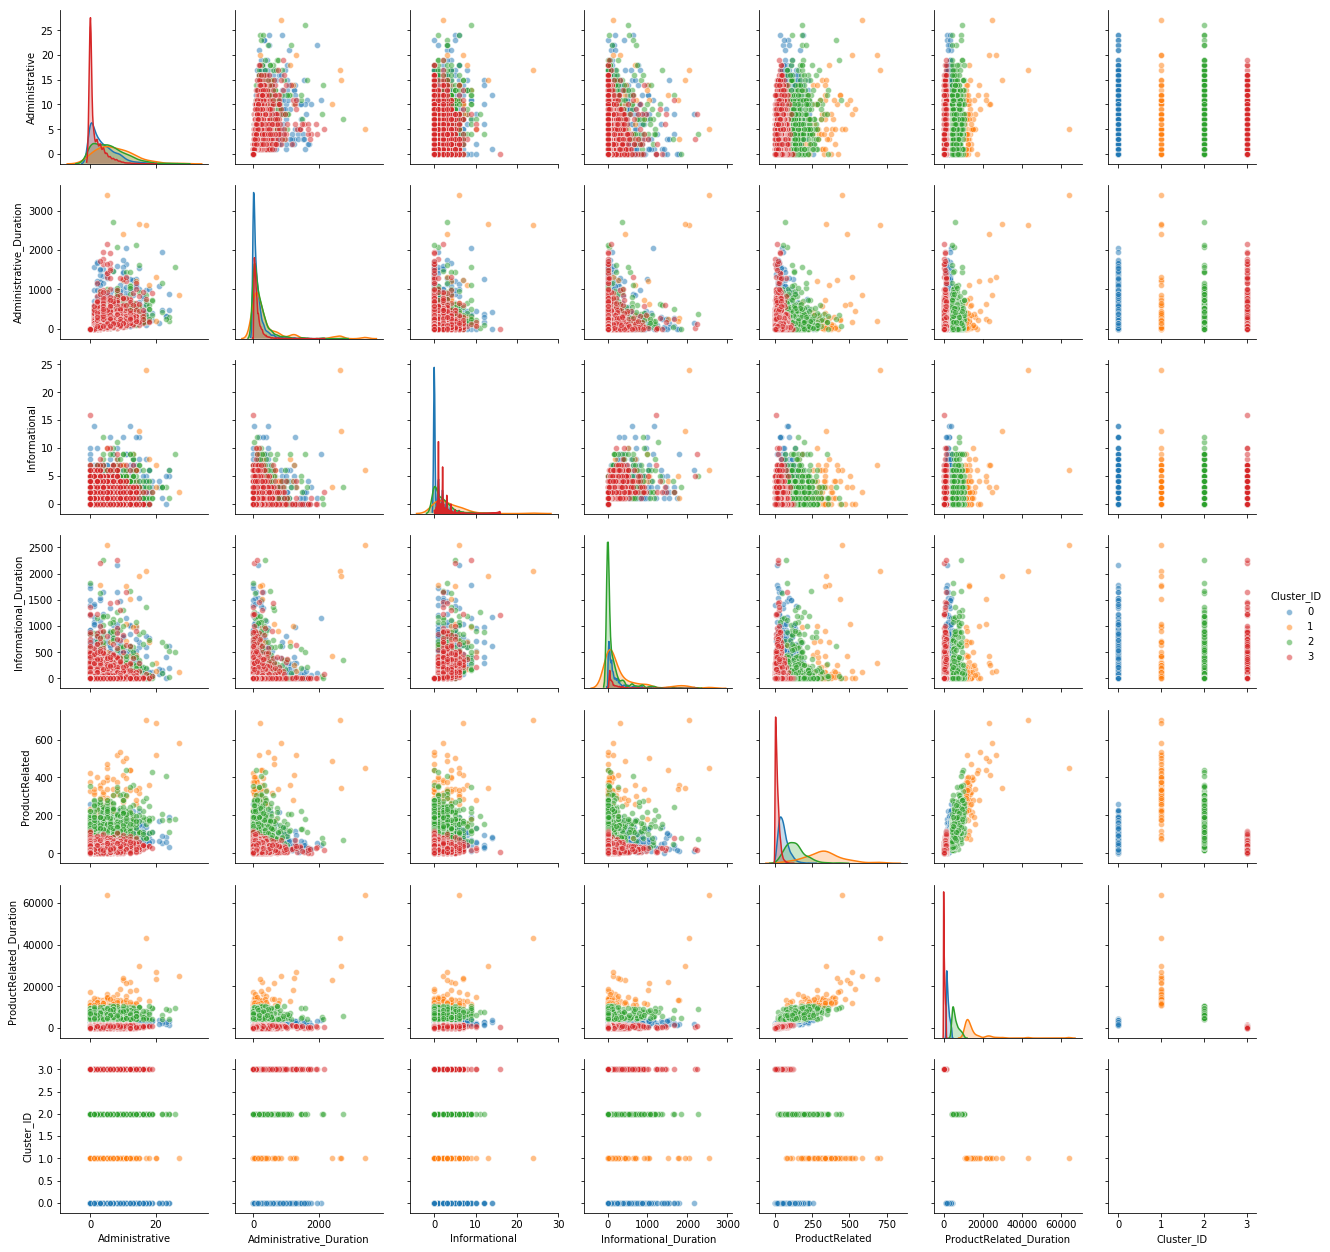

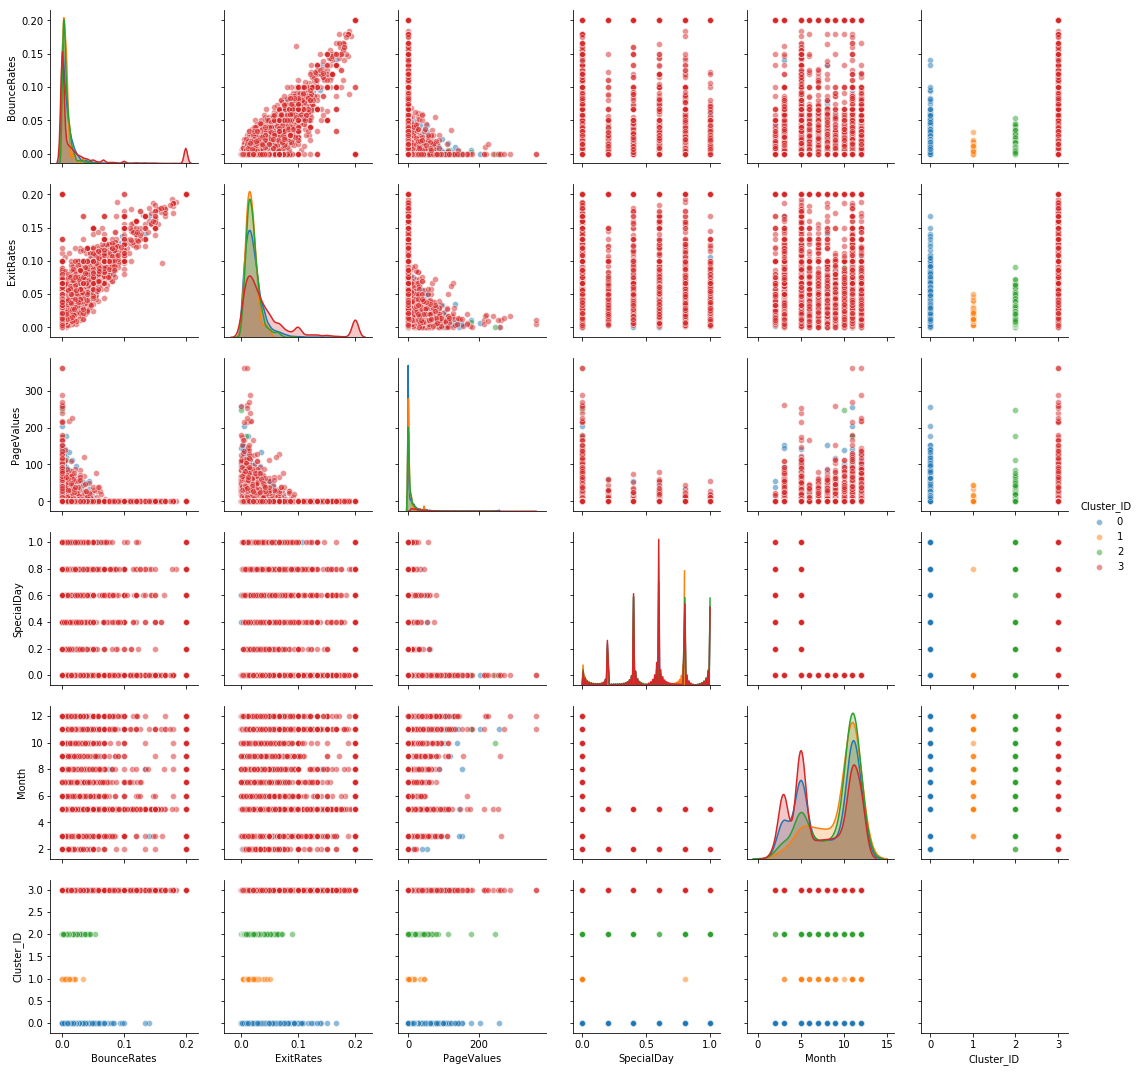

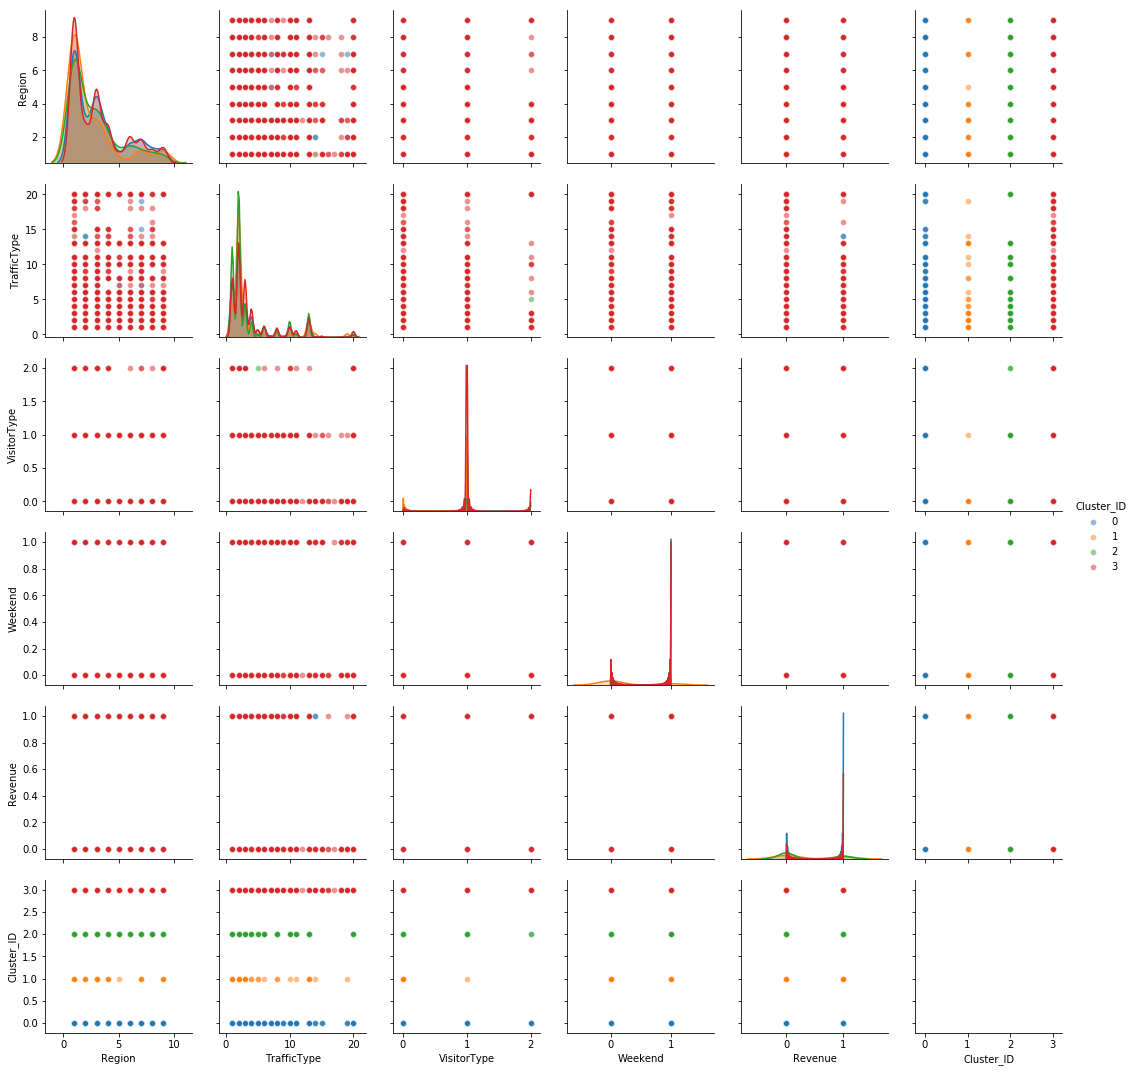

In [30]:
KprototypeResult(X,4)
col=df2.columns
print(col)

data1=df2[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
           'ProductRelated_Duration','Cluster_ID']]
data2=df2[['BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
           'Month','Cluster_ID']]
data3=df2[['Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue',
       'Cluster_ID']]

cluster_g = sns.pairplot(data1, hue='Cluster_ID', plot_kws={'alpha': 0.5})
plt.show
cluster_g = sns.pairplot(data2, hue='Cluster_ID', plot_kws={'alpha': 0.5})
plt.show
cluster_g = sns.pairplot(data3, hue='Cluster_ID', plot_kws={'alpha': 0.5})
plt.show

According to the above plots, the distribution of clusters has more differences in 

- `ProductRelated`
- `ProductRelated_Duration`
- `BounceRates`
- `ExitRates`
- `PageValues`

These variables are the most important features in task 3 model.

Despite the company wanting to know how the `Region` impacts the  usage, no noticable trends are apparent. The clusters do however differ in regards to `Month` and `Weekend`, which shows that the time of access may relate to other trends.

#### c. Explain the cluster results.

From above, we can see:
- The `cluster membership` has changed, a very small cluster of only 68 members was produce in cluster 1, which may indicate either too many clusters or particularly divergent members in that cluster.

Clusters:
- Cluster 0 spends almost no time in ProductRelated pages with a high bounce and exit rate. These users are likely not interested in the website and have been redirected there.

- Cluster 1 has the least members, but has the msot time spent in ProductRelated pages with a low pounce and exit rate, and pagevalue. This suggests those users engaged with the website and are actively shopping.

- Cluster 2 vists many ProductRelated pages but very quickly, spending little time each. With moderate-low bounce and exit rates. These visitors may be shopping in a disinterested way, only considering items for a short period ot see if they catch their eye.

- Cluster 3 is much like Cluster 1, having a high bounce and exit rate, but visiting and spending even less time on product related pages.

### 2. What is the effect of using the standardization method on the model above? Does the variable normalization process enable a better clustering solution?

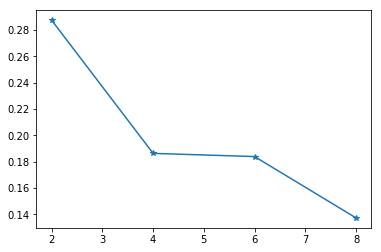

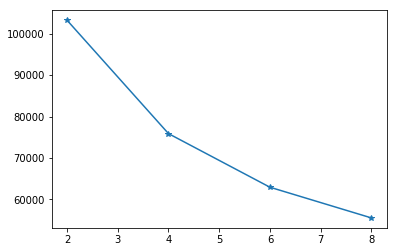

In [32]:
X=scaler.fit_transform(X)

Optimal_K(X)

Based on elbow method, the elbow is 4. The silhouette score indicates 4 is highest value since eblow is 4, Therefore the optimal K is set as **4** for clustering.

Centroid locations:
[[ 1.22343571  0.9271186   0.33278022  0.03829672  0.5110648   0.43475503
  -0.33381606 -0.49644444  0.49218556]
 [-0.38690224 -0.29920802 -0.25123605 -0.19099888 -0.24284633 -0.22348695
  -0.24642955 -0.16528766 -0.11645474]
 [-0.68493304 -0.44984107 -0.38771841 -0.24496274 -0.64994754 -0.59754488
   3.06800619  2.89443585 -0.31784528]
 [ 1.4271017   1.04869277  2.80411843  2.96517536  2.37001257  2.33221861
  -0.31124212 -0.47097391  0.09001696]]
[[-0.30903082  0.98387246 -0.89392928 -0.51474124 -0.40191529 -0.55117094
  -0.42883985]
 [-0.30903082 -0.78750177 -0.89392928 -0.51474124 -0.40191529 -0.55117094
  -0.42883985]
 [-0.30903082 -0.78750177 -0.89392928 -0.76317216 -0.40191529 -0.55117094
  -0.42883985]
 [-0.30903082  0.98387246 -0.89392928 -0.51474124 -0.40191529 -0.55117094
  -0.42883985]]
Cluster membership
1    8232
0    2481
2     990
3     580
Name: Cluster_ID, dtype: int64


/Users/oliver/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/oliver/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<function matplotlib.pyplot.show(*args, **kw)>

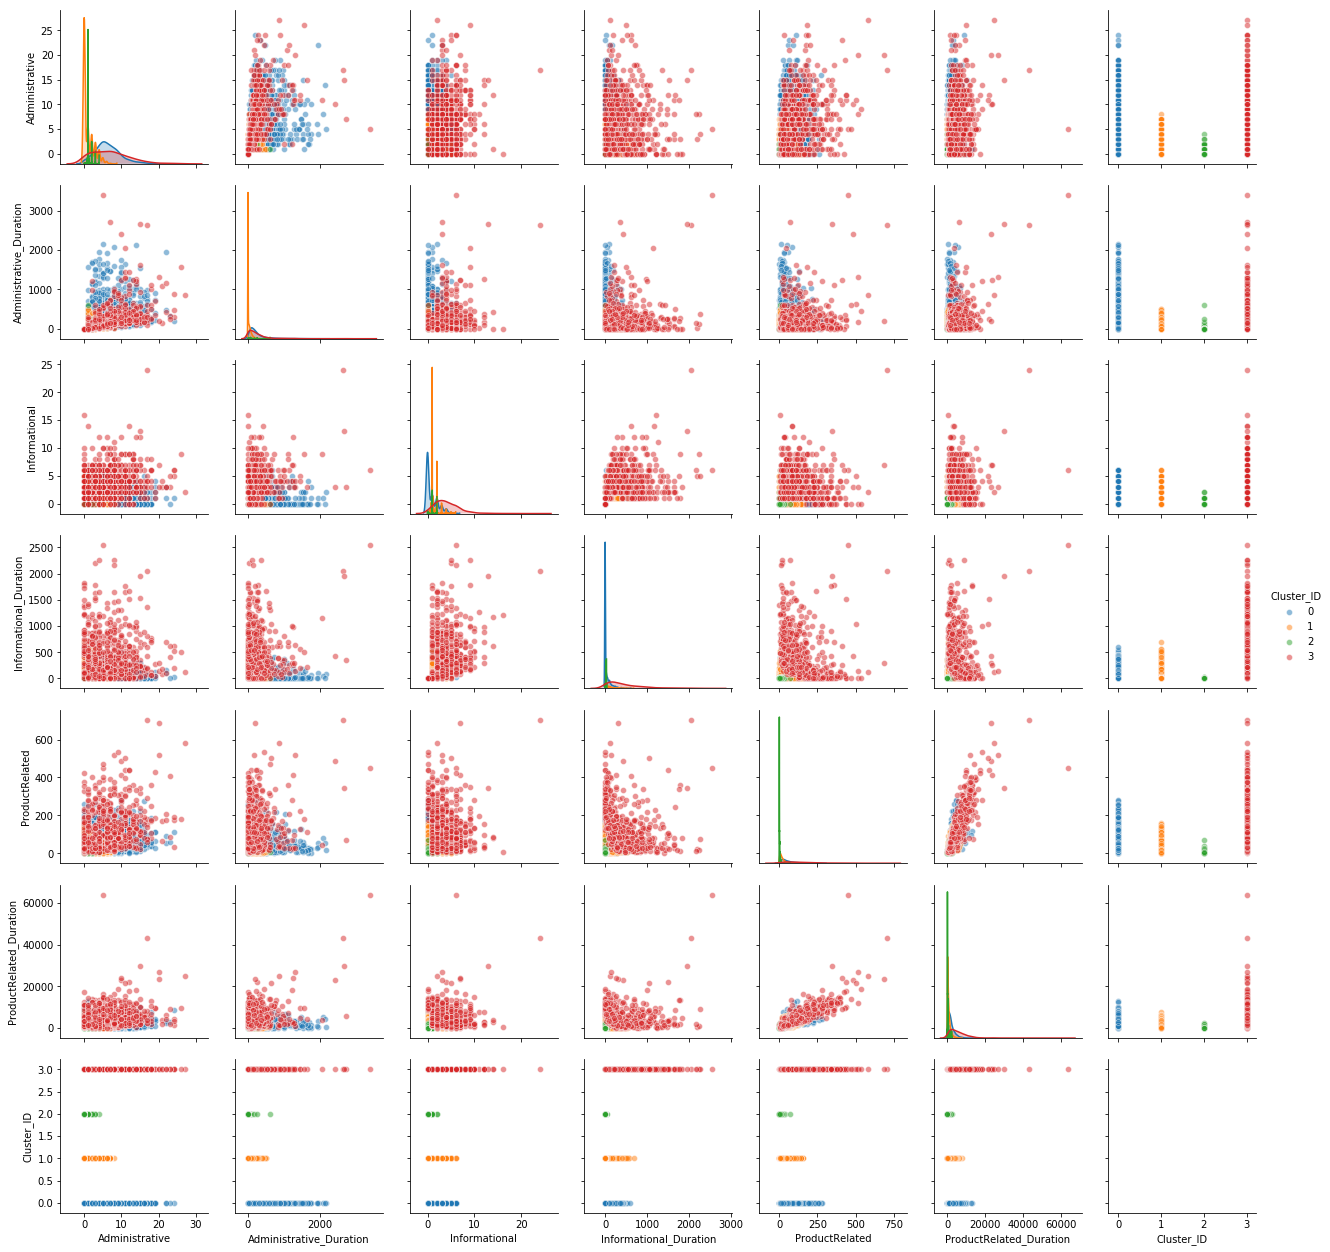

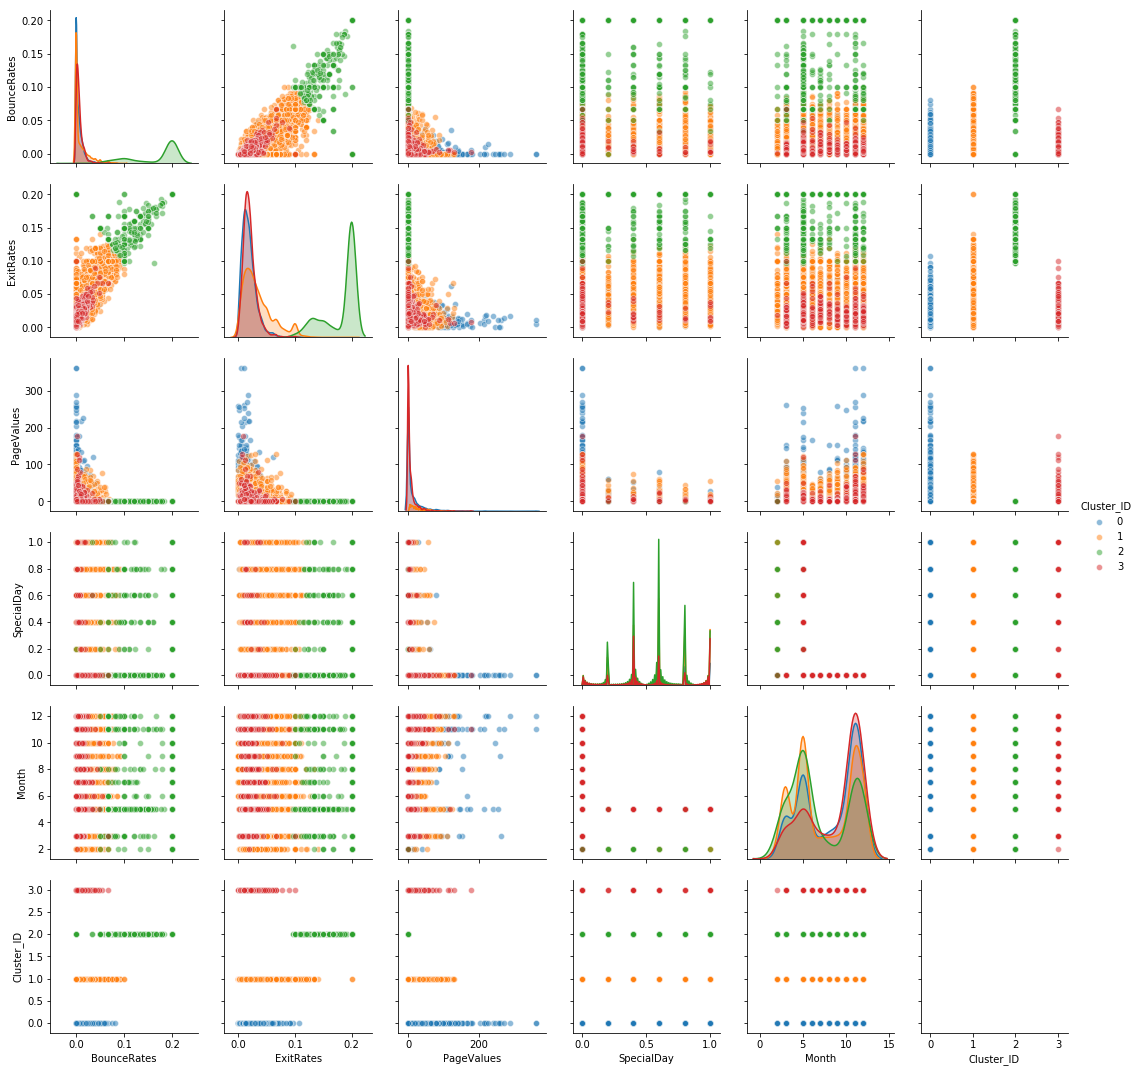

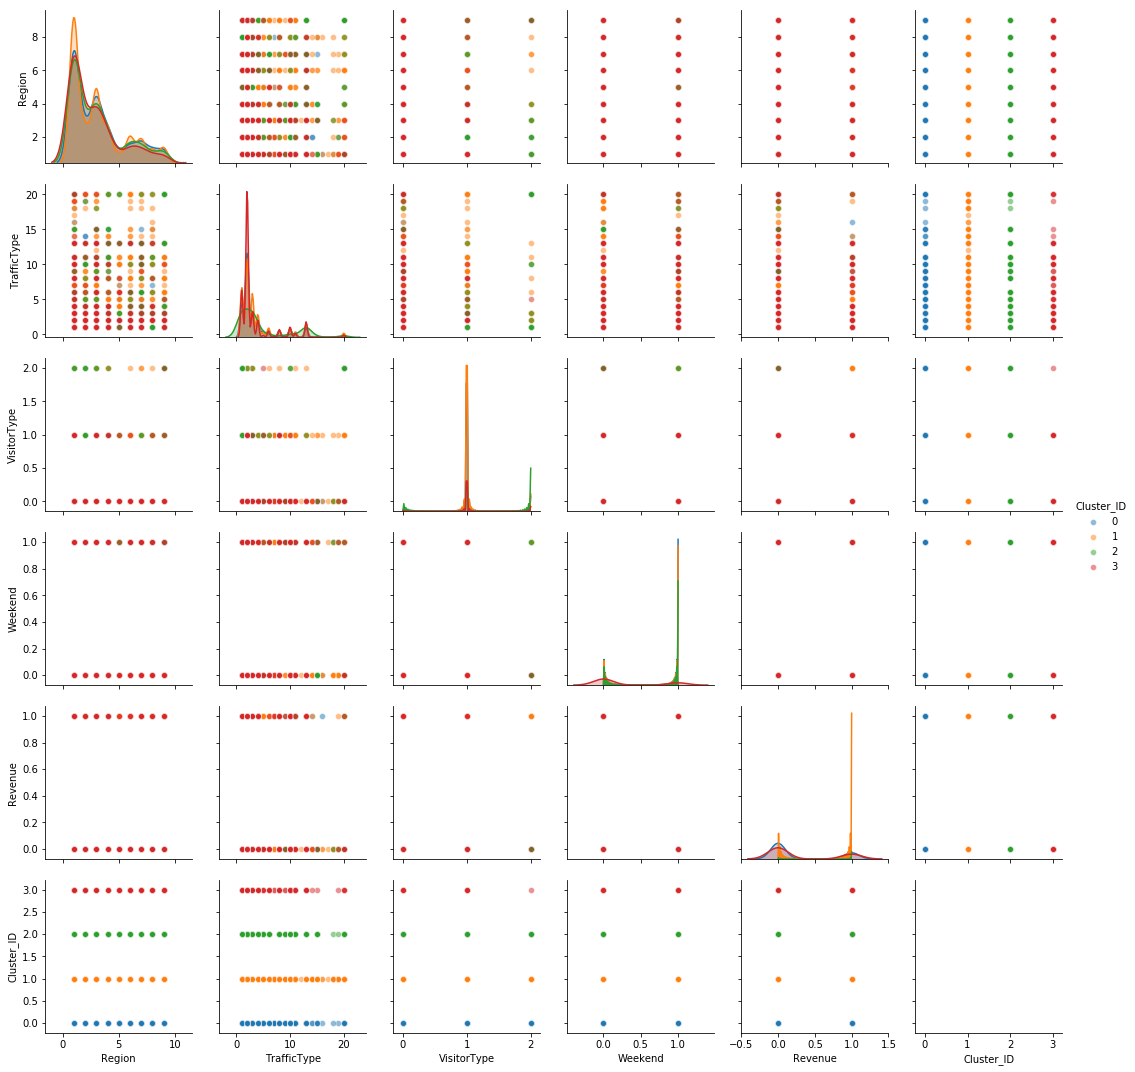

In [33]:
KprototypeResult(X,4)

data1=df2[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
           'ProductRelated_Duration','Cluster_ID']]
data2=df2[['BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
           'Month','Cluster_ID']]
data3=df2[['Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue',
       'Cluster_ID']]

cluster_g = sns.pairplot(data1, hue='Cluster_ID', plot_kws={'alpha': 0.5})
plt.show
cluster_g = sns.pairplot(data2, hue='Cluster_ID', plot_kws={'alpha': 0.5})
plt.show
cluster_g = sns.pairplot(data3, hue='Cluster_ID', plot_kws={'alpha': 0.5})
plt.show

After scaling, the model is improved. Cluster membership is also more evenly distributed, with the smallest group being almost an order of magnitude larger than the previous smallest (68). Some variables become much more distinct between the clusters as well, such as the pages and their durations, exit and bounce rates, page values and the months.

Overall, this model is much better on account of its better seperated clusters with less extreme memberships.

As before no trend is observed regarding the Region, however differences in Weekend and Month may prove useful.

### 3. Can you highlight the differences between the two clustering solutions (Tasks 2.1 & 3.1) focusing on cluster interpretation? In other words, explain what is the effect of adding other variables in the clustering analysis?



In task 2.1, the model is based on how users spend their time on the website, and the most important feature is  `ProductRelated_Duration`. When information was added, we found important features for grouping are   `ProductRelated`,`ProductRelated_Duration`, `BounceRates` `ExitRates` `PageValues`, and some differentiation on `Month` and `Weekend` which may prove  useful to the business. 

The second model is more robust, in that it allows for more detailed understanding of how clusters differ, with less extreme values of cluster membership.

#### Decision Making: Finally, could you detail - how the outcome of clustering analysis can be used by decision makers?




It is evident in Task 3.2 that cluster 0 of more than 2000 members has very low engagement with the site, in terms of duration of all 3 page types and also a high bounce rate and exit rate. This represent substantial lost business in either misallocated advertising placement bringing in users who quickly decide to leave the site, or in a lack of material on the site to engage the users effectively and securing a purchase. Knowing this will help inform the deicision makers in how to adjust their strategy to better capture these users.

In addition, the clustering will assist the company in organising their users into different demographics. For instance, in Task 3.2 some clusters are  more likely to shop on weekends than other shoppers. Knowing this allows for the formation of a strategy for better targetting of those users, perhaps in combination with user personnas incorperating that information.

In addition to trying to increase revenue from those indicators, it may also be helpful to try to reduce the BounceRate and ExitRate in the clusters that exhibit high valules for either, using those attributes as indicators of performance for the business.

### PART 2 : Association Mining the Online Retail Data

### Task 4.  Association Mining




#### 1. Can you identify data quality issues in this dataset for performing association?

In [14]:
import pandas as pd
import numpy as np

df=pd.read_csv('online_retail.csv', encoding = "ISO-8859-1") # Latin character set
df.info()

C:\Users\justi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532619 entries, 0 to 532618
Data columns (total 8 columns):
InvoiceNo      532619 non-null object
StockCode      532619 non-null object
Description    531165 non-null object
Quantity       532619 non-null int64
InvoiceDate    532619 non-null object
UnitPrice      532619 non-null float64
CustomerID     397924 non-null float64
Country        532619 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 32.5+ MB


In [15]:
#missing value
print(df.isnull().sum())

df.dropna(axis=0,inplace=True)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134695
Country             0
dtype: int64


From above, we can see `Description` and `CustomerID`contain missing values. Therefore, the row contains missing value should be droped. 

In [16]:
for i in df.columns:
    print(i,df[i].value_counts())

InvoiceNo 576339    542
579196    533
580727    529
578270    442
573576    435
567656    421
567183    399
575607    377
571441    364
570488    353
572552    352
568346    335
547063    294
569246    285
562031    277
554098    264
543040    259
570672    259
569897    239
572103    223
562046    219
566290    217
578233    212
574328    208
556484    205
571653    202
577504    198
579470    194
574481    191
575491    189
         ... 
568790      1
552885      1
568666      1
564046      1
538342      1
555840      1
566201      1
568415      1
538192      1
538193      1
538194      1
576902      1
568511      1
552789      1
555863      1
576877      1
568540      1
552814      1
542759      1
552815      1
542746      1
548316      1
552833      1
542736      1
538288      1
546462      1
538306      1
568595      1
576782      1
558070      1
Name: InvoiceNo, Length: 18538, dtype: int64
StockCode 85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
20725 

In [17]:
#StockCode should be a 5 digit number, but some bad values end with
#a character like 85123A.
def removeCharacter(text):
    if len(text)>5:
        text=text[:-1]
    return text
df['StockCode']=df['StockCode'].apply(removeCharacter)

Missing values were removed and the unusal text endings were corrected.

#### 2. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice

Association mining usually consists of two variables: a transaction ID and an item. In this case online retail store is interested in determining the associations between gift items sold online. we should use `InvoiceNo` and `Description` for the association analysis
<table>
    <tr>
        <th>Variable Name</th>
        <th>Role</th>
        <th>Measurement Level</th>
    </tr>
    <tr>
        <td>Description</td>
        <td>Target</td>
        <td>Nominal</td>
    </tr>
    <tr>
        <td>InvoiceNo</td>
        <td>ID</td>
        <td>Nominal</td>
    </tr>
</table>

In [18]:
transactions = df.groupby(['InvoiceNo'])['Description'].apply(list)
print(transactions.head(5))
print(len(transactions))

InvoiceNo
536365    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
536366    [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367    [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
536368    [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
536369                           [BATH BUILDING BLOCK WORD]
Name: Description, dtype: object
18538


#### 3. Conduct association mining and answer the following:
#### a. What is the highest lift value for the resulting rules? Which rule has this value?

In [19]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.008))

# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({' SET 2 TEA TOWELS I LOVE LONDON '}), support=0.010357104326248786, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' SET 2 TEA TOWELS I LOVE LONDON '}), confidence=0.010357104326248786, lift=1.0)]), RelationRecord(items=frozenset({'10 COLOUR SPACEBOY PEN'}), support=0.013054266911209408, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'10 COLOUR SPACEBOY PEN'}), confidence=0.013054266911209408, lift=1.0)]), RelationRecord(items=frozenset({'12 MESSAGE CARDS WITH ENVELOPES'}), support=0.010087388067752725, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'12 MESSAGE CARDS WITH ENVELOPES'}), confidence=0.010087388067752725, lift=1.0)]), RelationRecord(items=frozenset({'12 PENCIL SMALL TUBE WOODLAND'}), support=0.01488833746898263, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'12 PENCIL SMALL TUBE WOODLAND'}), confidence

In [20]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

print(result_df.head(20))

   Left_side                           Right_side   Support  Confidence  Lift
0                 SET 2 TEA TOWELS I LOVE LONDON   0.010357    0.010357   1.0
1                          10 COLOUR SPACEBOY PEN  0.013054    0.013054   1.0
2                 12 MESSAGE CARDS WITH ENVELOPES  0.010087    0.010087   1.0
3                   12 PENCIL SMALL TUBE WOODLAND  0.014888    0.014888   1.0
4             12 PENCILS SMALL TUBE RED RETROSPOT  0.016561    0.016561   1.0
5                     12 PENCILS SMALL TUBE SKULL  0.015697    0.015697   1.0
6                       12 PENCILS TALL TUBE POSY  0.009009    0.009009   1.0
7              12 PENCILS TALL TUBE RED RETROSPOT  0.012623    0.012623   1.0
8                     12 PENCILS TALL TUBE SKULLS  0.011598    0.011598   1.0
9                   12 PENCILS TALL TUBE WOODLAND  0.011220    0.011220   1.0
10            15CM CHRISTMAS GLASS BALL 20 LIGHTS  0.011544    0.011544   1.0
11                        20 DOLLY PEGS RETROSPOT  0.009818    0

In [21]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
result_df.head(10)


,Left_side,Right_side,Support,Confidence,Lift
1991,"HERB MARKER THYME,HERB MARKER PARSLEY",HERB MARKER CHIVES,0.008038,0.871345,97.307194
1985,"HERB MARKER MINT,HERB MARKER PARSLEY",HERB MARKER CHIVES,0.008038,0.871345,97.307194
1990,"HERB MARKER CHIVES ,HERB MARKER THYME",HERB MARKER PARSLEY,0.008038,0.967532,95.915064
1987,"HERB MARKER CHIVES ,HERB MARKER ROSEMARY",HERB MARKER PARSLEY,0.008038,0.967532,95.915064
1983,"HERB MARKER MINT,HERB MARKER CHIVES",HERB MARKER PARSLEY,0.008038,0.967532,95.915064
1989,"HERB MARKER CHIVES ,HERB MARKER PARSLEY",HERB MARKER THYME,0.008038,0.961290,95.808602
1988,"HERB MARKER ROSEMARY,HERB MARKER PARSLEY",HERB MARKER CHIVES,0.008038,0.856322,95.629483
2382,"HERB MARKER ROSEMARY,HERB MARKER PARSLEY,HERB ...",HERB MARKER THYME,0.008199,0.955975,95.278826
2386,"HERB MARKER MINT,HERB MARKER ROSEMARY,HERB MAR...",HERB MARKER THYME,0.008307,0.950617,94.744856
2378,"HERB MARKER MINT,HERB MARKER ROSEMARY,HERB MAR...",HERB MARKER THYME,0.008145,0.949686,94.651992


Highest lift is 97.307194, there are two rules:

HERB MARKER PARSLEY,HERB MARKER THYME implies HERB MARKER CHIVES 

HERB MARKER PARSLEY,HERB MARKER MINT implies HERB MARKER CHIVES

#### b. What is the highest confidence value for the resulting rules? Which rule has this value?



In [22]:
result_df = result_df.sort_values(by='Confidence', ascending=False)
result_df.head(10)

,Left_side,Right_side,Support,Confidence,Lift
2387,"HERB MARKER MINT,HERB MARKER THYME,HERB MARKER...",HERB MARKER ROSEMARY,0.008307,0.968553,94.500232
2379,"HERB MARKER MINT,HERB MARKER THYME,HERB MARKER...",HERB MARKER ROSEMARY,0.008145,0.967949,94.441228
1990,"HERB MARKER CHIVES ,HERB MARKER THYME",HERB MARKER PARSLEY,0.008038,0.967532,95.915064
1987,"HERB MARKER CHIVES ,HERB MARKER ROSEMARY",HERB MARKER PARSLEY,0.008038,0.967532,95.915064
1983,"HERB MARKER MINT,HERB MARKER CHIVES",HERB MARKER PARSLEY,0.008038,0.967532,95.915064
1999,"HERB MARKER MINT,HERB MARKER THYME",HERB MARKER ROSEMARY,0.008739,0.964286,94.083835
2383,"HERB MARKER THYME,HERB MARKER PARSLEY,HERB MAR...",HERB MARKER ROSEMARY,0.008199,0.962025,93.863291
1989,"HERB MARKER CHIVES ,HERB MARKER PARSLEY",HERB MARKER THYME,0.008038,0.961290,95.808602
1984,"HERB MARKER CHIVES ,HERB MARKER PARSLEY",HERB MARKER MINT,0.008038,0.961290,93.300524
1986,"HERB MARKER CHIVES ,HERB MARKER PARSLEY",HERB MARKER ROSEMARY,0.008038,0.961290,93.791579


In [23]:
print(result_df.iloc[0]['Left_side'])

HERB MARKER MINT,HERB MARKER THYME,HERB MARKER PARSLEY


Highest Confidence is 0.968553 for the following rule:

HERB MARKER MINT,HERB MARKER THYME,HERB MARKER PARSLEY implies HERB MARKER ROSEMARY

#### c. Discuss and explain the results. Interpret them to discuss the rule-set obtained.

The results indicate that when users buy Mint, Thyme, and Parsely they are likely to subsequently buy Rosemary. This result is foind with good confidence (0.97) and high lift (95) meaning that it is statistically significant and of considerably predictive power.

The result of part a. being:

- Parsely, Thyme, then Chives
- Parsely, Mint, then Chives 

with Confidence (0.87) and Lift (97) imply the rules happen slightly more compared to the part b. rules but in a moderately lower percentage of cases of the left hand side.

These rules are both quite strong, which makes sense considering how a shopper will be likely to buy spices together, either to fill up a spice cupboard or as part of a recipe, and many spices typically occur in recipes together. The results being dominated by spice combinations of high confidence and lift is therefore not surprising.

### 4. The store is particularly interested in products that individuals purchase when they buy “HERB MARKER CHIVES”.
#### a. How many rules are in the subset?

In [32]:
result_df.loc[result_df['Left_side'] =='HERB MARKER CHIVES ']

,Left_side,Right_side,Support,Confidence,Lift
1100,HERB MARKER CHIVES,HERB MARKER PARSLEY,0.008361,0.933735,92.564590
1104,HERB MARKER CHIVES,HERB MARKER THYME,0.008307,0.927711,92.461847
1102,HERB MARKER CHIVES,HERB MARKER ROSEMARY,0.008307,0.927711,90.515282
1098,HERB MARKER CHIVES,HERB MARKER MINT,0.008307,0.927711,90.041380


In [25]:
result_df.loc[result_df['Right_side'] =='HERB MARKER CHIVES ']

,Left_side,Right_side,Support,Confidence,Lift
1985,"HERB MARKER MINT,HERB MARKER PARSLEY",HERB MARKER CHIVES,0.008038,0.871345,97.307194
1991,"HERB MARKER THYME,HERB MARKER PARSLEY",HERB MARKER CHIVES,0.008038,0.871345,97.307194
1988,"HERB MARKER ROSEMARY,HERB MARKER PARSLEY",HERB MARKER CHIVES,0.008038,0.856322,95.629483
1101,HERB MARKER PARSLEY,HERB MARKER CHIVES,0.008361,0.828877,92.564590
1105,HERB MARKER THYME,HERB MARKER CHIVES,0.008307,0.827957,92.461847
1103,HERB MARKER ROSEMARY,HERB MARKER CHIVES,0.008307,0.810526,90.515282
1099,HERB MARKER MINT,HERB MARKER CHIVES,0.008307,0.806283,90.041380
290,,HERB MARKER CHIVES,0.008955,0.008955,1.000000


In [35]:
print(len(result_df.loc[result_df['Left_side'] =='HERB MARKER CHIVES '])+
     len(result_df.loc[result_df['Right_side'] =='HERB MARKER CHIVES ']))

12


There are 12 rules in the subset, including a rule with lift 1 and extremely low confidence, meaning that it is not significant and can be ignored.

#### b. Based on the rules, what are the other products these individuals are most likely to purchase?
They are likely buy other spices: Parsely, Thyme, Rosemary, Mint or combinations of multiple of them.

### 5. Can you perform sequence analysis on this dataset? If yes, present your results. If not, rationalise why?

Sequence analysis is possible becacuse the order of events is known.

In [26]:
# sort value
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df2 = df.sort_values('InvoiceDate')

<table>
    <tr>
        <th>Variable Name</th>
        <th>Role</th>
        <th>Measurement Level</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>Description</td>
        <td>Target</td>
        <td>Norminal</td>
        <td> Product</td>
    </tr>
    <tr>
        <td>InvoiceDate</td>
        <td>Sequence Order</td>
        <td>Ordinal</td>
        <td>Invoice Made Date</td>
    </tr>
    <tr>
        <td>CustomerID</td>
        <td>ID</td>
        <td>Norminal</td>
        <td>User ID</td>
    </tr>
</table>

In [27]:

sequences = df2.groupby(['CustomerID'])['Description'].apply(list)

sequences = transactions.values.tolist()

print(sequences[:5])

[['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER'], ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION'], ['BATH BUILDING BLOCK WORD']]


In [28]:
from collections import defaultdict
import subprocess
import re

''' Uses SPMF to find association rules in supplied transactions '''
def get_association_rules(sequences, min_sup, min_conf):
    # step 1: create required input for SPMF    
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1   
    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf.jar', 'run', 'RuleGrowth', 'seq_rule_input.txt', 'seq_rule_output.txt', '10%', '10%'], shell=True)
    
    # read back the output rules
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

In [29]:
get_association_rules(sequences, 0.1, 0.1)

,Left_rule,Right_rule,Support,Confidence
0,[WHITE HANGING HEART T-LIGHT HOLDER],[WHITE METAL LANTERN],0.010465,0.498715
1,[WHITE HANGING HEART T-LIGHT HOLDER],"[WHITE METAL LANTERN, CREAM CUPID HEARTS COAT ...",0.004855,0.231362
2,[WHITE HANGING HEART T-LIGHT HOLDER],[CREAM CUPID HEARTS COAT HANGER],0.005988,0.285347
3,[HAND WARMER RED POLKA DOT],[BATH BUILDING BLOCK WORD],0.007660,0.651376


The results indicate that the rules may be of moderate confidence, making them worthwhile to consider. 65% of those who buy hand warmers also buy word blocks for the bath, which is fairly strong, and also unexpected as those iteam at face value seem unrelated. This strong unepected result is encouraging for the usefulness of sequence analysis.

However, only 4 rules are present, which for such a large dataset implies that sequence analysis is of limited usefulness.

### 6. How the outcome of this study can be used by decision makers?

Association mining and sequence analysis are very useful for retail stores because it allows for targetted marketting. For example, in the above case if `HAND WARMER RED POLKA DOT` was purchased the site could recommend `BATH BUILDING BLOCK WORD` on checkout. It can also be used to effectively bundle products together, to incentivise additional purchasing or make the shoppers experience more convenient, as in the case wit hthe spices of part 4.

Therefore, one expects that the information presented here will be of significant value to decision makers. However, in the case of sequence analysis there were very few rules discovere, which may limit the usefulness on this particular dataset.

###  Part 3: Text Mining (Clustering) the News stories

#### 1. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.

There are number of columns in this dataset. The `LANGUAGE`, `OMITTED`, `TRUNCATED`, `EXTENSION`,`SIZE` and `FILTEREDSIZE` columns provide no meaningful data to determine clusters of stories based on similar topics. Also, the `URL`,`NAME`, and `FILTERED` columns provide document location which is not relate to news context. Moreover, the `CREATED`, `ACCESSED` and `MODIFIED` appear to be the date based values which provide no meaningful value for story context.

As our aim is to discern stories based on their context, we only need to inspect the `TEXT` column, which contains full text of each news stories. Therefore, only `TEXT` column is include in the analysis and all other columns are rejected.

<table>
    <tr>
        <th>Variable Name</th>
        <th>Role</th>
        <th>Measurement Level</th>
    </tr>
    <tr>
        <td>TEXT</td>
        <td>Feature</td>
        <td>Norminal</td>
    </tr>

</table>


In [50]:
import pandas as pd
#read dataset
df = pd.read_csv('bbc.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
TEXT            200 non-null object
URI             200 non-null object
NAME            200 non-null object
FILTERED        200 non-null object
LANGUAGE        200 non-null object
CREATED         200 non-null int64
ACCESSED        200 non-null int64
MODIFIED        200 non-null int64
TRUNCATED       200 non-null int64
OMITTED         200 non-null int64
EXTENSION       200 non-null object
SIZE            200 non-null int64
FILTEREDSIZE    200 non-null int64
dtypes: int64(7), object(6)
memory usage: 20.4+ KB


#### 2. Can you identify data quality issues in order to perform text mining?

In order to prepare text for mining, it is important to remove punctuation and stopwords from nltk. Also, it needs to lemmatised to reduce words to their base format. Finally, using **TfidfVectorizer** to vectorise or transform the tokens into matrices so that it can be used for clustering.

Also, context contains **�** which will be removed.

In [51]:
import string
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer


# initialise WordNet lemmatizer and punctuation filter
lemmatizer = WordNetLemmatizer()
punct = set(string.punctuation)

stopwords = set(sw.words('english'))
stopwords.update('�')

def lemmatize(token, tag):
    tag = {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
        }.get(tag[0], wn.NOUN)
    
    return lemmatizer.lemmatize(token, tag)

def cab_tokenizer(document):
    # initialize token list
    tokens = []
    
    # split the document into sentences
    for sent in sent_tokenize(document):
        # split the document into tokens and then create part of speech tag for each token
        for token, tag in pos_tag(wordpunct_tokenize(sent)):
            # preprocess and remove unnecessary characters
            token = token.lower()
            token = token.strip()
            token = token.strip('_')
            token = token.strip('*')

            # If stopword, ignore token and continue
            if token in stopwords:
                continue

            # If punctuation, ignore token and continue
            if all(char in punct for char in token):
                continue

            # Lemmatize the token and add back to the tokens list
            lemma = lemmatize(token, tag)
            tokens.append(lemma)
    
    return tokens


# tf idf vectoriser
tfidf_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
X = tfidf_vec.fit_transform(df['TEXT'])

# see the number of unique tokens produced by the vectorizer. Lots of them...
print(len(tfidf_vec.get_feature_names()))

36340


There are 36340 unique tokens found by the tf.idf vectorizer without documnet and term frequency fitering. This is too many tokens to generate meaningful clusters since some high term frequency and document frequencty words are not filterd.

In [1]:
#Determining K
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

def display_graph_elbow_method(data):
    clusters = []
    inertia_vals = []
       
    #Convert df to matrix
    #X = data.as_matrix()
    
    #scaler = StandardScaler()
    #X = scaler.fit_transform(X)
    # list to save the clusters and cost
    for k in range(2, 15, 1):
        model = KMeans(n_clusters = k, random_state= 42)
        model.fit(data)
    
        clusters.append(model)
        inertia_vals.append(model.inertia_)
    
    
    print("elbow method find best K:")
    # plot the inertia vs K values
    plt.plot(range(2,15,1), inertia_vals, marker='*')
    plt.title("Elbow Method")
    plt.show()
    
    return clusters

def display_silhouette_score(X, clusters):
    silhouette_scores = {}
    for i in range(2, len(clusters), 1):
        score = silhouette_score(X, clusters[i].predict(X))
        silhouette_scores[i] = score
    
    optimal_k = max(silhouette_scores, key = silhouette_scores.get)    
    print("silhouette_score find best K:")
    plt.plot(range(2,len(clusters),1), list(silhouette_scores.values()), marker='*')
    plt.title("Silhouette score")
    plt.show()   
    
    #print("Optimal K value: " + str(optimal_k))    
    return optimal_k   

elbow method find best K:


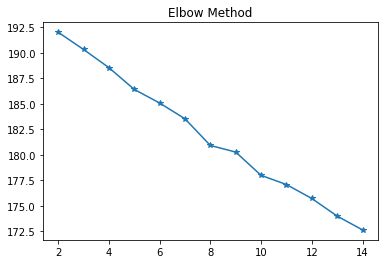

silhouette_score find best K:


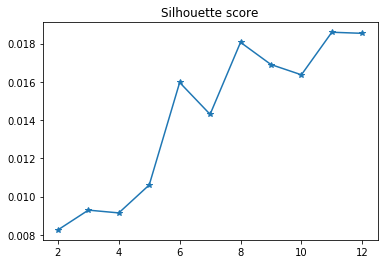

In [53]:
clusters = display_graph_elbow_method(X)
best_k = display_silhouette_score(X, clusters)

Base on elbow method, the elbow is somewhere between 8 and 9. The silhouette socre indicate 8 is best K, therefore, the optimal K is 8 for clustering.

In [54]:
from sklearn.cluster import KMeans


# K means clustering using the term vector
kmeans = KMeans(n_clusters= 8 , random_state = 42).fit(X)

# function to visualise text cluster. Useful for the assignment too :)
def visualise_text_cluster(n_clusters, cluster_centers, terms, num_word = 5):
    # -- Params --
    # cluster_centers: cluster centers of fitted/trained KMeans/other centroid-based clustering
    # terms: terms used for clustering
    # num_word: number of terms to show per cluster. Change as you please.
    
    # find features/terms closest to centroids
    ordered_centroids = cluster_centers.argsort()[:, ::-1]
    
    for cluster in range(n_clusters):
        print("Top terms for cluster {}:".format(cluster), end=" ")
        for term_idx in ordered_centroids[cluster, :10]:
            print(terms[term_idx], end=', ')
        print()
        
# call it
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

Top terms for cluster 0: marathon, cross country, race, chepkemei, paula, radcliffe, country, cross, year, edinburgh, 
Top terms for cluster 1: england, ireland, game, wale, rugby, say, nation, six nation, win, six, 
Top terms for cluster 2: 6, open, roddick, australian, 7, australian open, moya, win, hewitt, play, 
Top terms for cluster 3: pakistan, australia, cricket, test, wicket, india, shane, ponting, run, shoaib, 
Top terms for cluster 4: drug, athletics, ban, greek, test, athlete, athens, iaaf, sprinter, kenteris, 
Top terms for cluster 5: england, south, vaughan, south africa, africa, ball, strauss, day, cricket, trescothick, 
Top terms for cluster 6: club, say, chelsea, want, liverpool, player, league, play, arsenal, game, 
Top terms for cluster 7: indoor, world, record, olympic, gold, idowu, 60m, birmingham, greene, jump, 


The output above shows the terms characterising each cluster. This clustering solution does not give good grouping. The clusters generated with unfilitered terms are damaged by high frequency, low value terms. Therefore, it is necessary to perform feature selection to remove the unimportant terms.

#### 3. Based on the ZIPF plot, list the top 10 terms that will be least useful for clustering purpose.

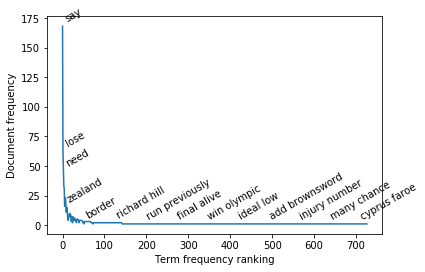

Top 10 Least Useful Terms(by orders)
{'term': 'say', 'idx': 27451, 'tf': 447, 'df': 168}
{'term': 'year', 'idx': 36024, 'tf': 308, 'df': 134}
{'term': 'game', 'idx': 13306, 'tf': 249, 'df': 106}
{'term': 'win', 'idx': 35326, 'tf': 246, 'df': 102}
{'term': 'play', 'idx': 23833, 'tf': 240, 'df': 104}
{'term': 'still england', 'idx': 30525, 'tf': 1, 'df': 1}
{'term': 'team 2006', 'idx': 31711, 'tf': 1, 'df': 1}
{'term': '2006 believe', 'idx': 687, 'tf': 1, 'df': 1}
{'term': 'believe england', 'idx': 4412, 'tf': 1, 'df': 1}
{'term': 'captain world', 'idx': 5857, 'tf': 1, 'df': 1}


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating tf-idf terms - a bit slow, do it occasionaly
def calculate_tf_idf_terms(document_col):
    # Param - document_col: collection of raw document text that you want to analyse
    from sklearn.feature_extraction.text import CountVectorizer

    # use count vectorizer to find TF and DF of each term
    count_vec = CountVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
    X_count = count_vec.fit_transform(df['TEXT'])
    
    # create list of terms and their tf and df
    terms = [{'term': t, 'idx': count_vec.vocabulary_[t],
              'tf': X_count[:, count_vec.vocabulary_[t]].sum(),
              'df': X_count[:, count_vec.vocabulary_[t]].count_nonzero()}
             for t in count_vec.vocabulary_]
    
    return terms
    
terms = calculate_tf_idf_terms(df['TEXT'])

# visualisation of ZIPF law
def visualise_zipf(terms, itr_step = 50):
    from scipy.spatial.distance import euclidean
    from math import sqrt
    
    # --- Param ---
    # terms: collection of terms dictionary from calculate_tf_idf_terms function
    # itr_step: used to control how many terms that you want to plot. Num of terms to plot = N terms / itr_step
    
    # sort terms by its frequency
    terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True)
    
    # select a few of the terms for plotting purpose
    sel_terms = [terms[i] for i in range(0, len(terms), itr_step)]
    labels = [term['term'] for term in sel_terms]
    
    # plot term frequency ranking vs its DF
    plt.plot(range(len(sel_terms)), [x['df'] for x in sel_terms])
    plt.xlabel('Term frequency ranking')
    plt.ylabel('Document frequency')
    
    max_x = len(sel_terms)
    max_y = max([x['df'] for x in sel_terms])
    
    # annotate the points
    prev_x, prev_y = 0, 0
    for label, x, y in zip(labels,range(len(sel_terms)), [x['df'] for x in sel_terms]):
        # calculate the relative distance between labels to increase visibility
        x_dist = (abs(x - prev_x) / float(max_x)) ** 2
        y_dist = (abs(y - prev_y) / float(max_y)) ** 2
        scaled_dist = sqrt(x_dist + y_dist)
        
        if (scaled_dist > 0.1):
            plt.text(x+2, y+2, label, {'ha': 'left', 'va': 'bottom'}, rotation=30)
            prev_x, prev_y = x, y
    
    plt.show()
    
    print("Top 10 Least Useful Terms(by orders)")
    for term in terms[0:5]:
        print(term)
    for term in terms[-5:]:
        print(term)
    
    
    return terms
# store terms ordered by term frequency, document frequency    
order_terms = visualise_zipf(terms)


Using ZIPF law, the top 10 least useful terms for clustering puprose are indicated above.

#### 4. Did you disregard any frequent terms in addition to items automatically selected by the Filter tool?

The default filter did not identify several high-frequency terms, that we judge should be removed also.

In [56]:
doc_frequency = [0] * len(df['TEXT'])

for i, term in enumerate (order_terms):
    if i < 30:
        print(str(i+1) + ".\tTerm:",
                 term['term'],
                 '\tdf:', (term['df'] / len(df['TEXT'])),
                 '\ttf:', term['tf']
                          )   
    doc_frequency[term['df'] - 1] += 1

1.	Term: say 	df: 0.84 	tf: 447
2.	Term: year 	df: 0.67 	tf: 308
3.	Term: game 	df: 0.53 	tf: 249
4.	Term: win 	df: 0.51 	tf: 246
5.	Term: play 	df: 0.52 	tf: 240
6.	Term: one 	df: 0.52 	tf: 204
7.	Term: go 	df: 0.56 	tf: 203
8.	Term: take 	df: 0.56 	tf: 202
9.	Term: england 	df: 0.26 	tf: 199
10.	Term: two 	df: 0.515 	tf: 197
11.	Term: time 	df: 0.575 	tf: 189
12.	Term: first 	df: 0.445 	tf: 185
13.	Term: world 	df: 0.46 	tf: 180
14.	Term: get 	df: 0.435 	tf: 175
15.	Term: player 	df: 0.41 	tf: 164
16.	Term: make 	df: 0.54 	tf: 163
17.	Term: would 	df: 0.465 	tf: 156
18.	Term: back 	df: 0.425 	tf: 149
19.	Term: come 	df: 0.425 	tf: 146
20.	Term: team 	df: 0.37 	tf: 144
21.	Term: last 	df: 0.47 	tf: 143
22.	Term: match 	df: 0.335 	tf: 133
23.	Term: second 	df: 0.39 	tf: 132
24.	Term: set 	df: 0.335 	tf: 131
25.	Term: 6 	df: 0.185 	tf: 130
26.	Term: give 	df: 0.39 	tf: 126
27.	Term: day 	df: 0.315 	tf: 126
28.	Term: open 	df: 0.23 	tf: 126
29.	Term: final 	df: 0.29 	tf: 120
30.	Term: ne

Observing top 30 most frequent terms from the dataset, it can be seen from the graph that most of terms are vague terms. Also, these high frequency terms occur in 40% - 60% documents. However, term **England** only occur in 26% document which may provide useful information. Therefore, term **England** should not be filtered.



In [57]:
#Show distribution of document frequencies.

print("Sum of Document Frequency 1 to 5:", sum(doc_frequency[0:5]))

print("df = 1:", doc_frequency[0])

print("df = 2 :", doc_frequency[1])

print("df = 3 :", doc_frequency[2])

print("df = 4 :", doc_frequency[3])

print("df = 5 :", doc_frequency[4])

Sum of Document Frequency 1 to 5: 35101
df = 1: 29435
df = 2 : 3772
df = 3 : 1058
df = 4 : 523
df = 5 : 313


There are 35101 tokens that appear in 5 or less documents, and over 29435 tokens only occured in one document. Also, there are 3772 tokens appear in 2 or less documents. Therefore, filtering a larger minimum document frequency will remove too many terms which may loss meaningful information.

Therefore, based on ZIPF plot and section above, all terms that occured at least twice in different documents and accured in max 50% of all document will be ignore through filtering.

Only terms that has only occured in one document and has more than 50% document frequency will be removed.

#### 5. Justify the term weighting option selected.

The maximum document frequency is set to 50%  and minimum of 2 documents to remove high frequency terms

In [60]:
# tf idf vectoriser
tfidf_vec = TfidfVectorizer(strip_accents = 'unicode', tokenizer=cab_tokenizer, ngram_range=(1,2), min_df= 2, max_df = 0.5)
X_filter= tfidf_vec.fit_transform(df['TEXT'])

# see the number of unique tokens produced by the vectorizer
count_token = len(tfidf_vec.get_feature_names())
print('Unique tokens for 50% and has minimum of 2 document frequency:',count_token)


# K means clustering using the new term vector, time it for comparison to SVD
kmeans_fil = KMeans(n_clusters= 8, random_state = 42).fit(X_filter)

# visualisation
print('--Top Terms for Cluster--')
visualise_text_cluster(kmeans_fil.n_clusters, kmeans_fil.cluster_centers_, tfidf_vec.get_feature_names())

Unique tokens for 50% and has minimum of 2 document frequency: 6894
--Top Terms for Cluster--
Top terms for cluster 0: race, world, marathon, indoor, cross country, paula, radcliffe, chepkemei, record, cross, 
Top terms for cluster 1: england, ireland, rugby, wale, nation, six nation, six, scotland, half, lion, 
Top terms for cluster 2: open, 6, roddick, australian, 7, australian open, hewitt, moya, federer, match, 
Top terms for cluster 3: pakistan, australia, wicket, ponting, test, gillespie, younis, run, shane, youhana, 
Top terms for cluster 4: drug, athletics, ban, test, athens, athlete, greek, iaaf, sprinter, federation, 
Top terms for cluster 5: south, england, ball, africa, south africa, vaughan, day, jones, strauss, cricket, 
Top terms for cluster 6: club, want, liverpool, player, chelsea, manager, newcastle, season, real, get, 
Top terms for cluster 7: sri, sri lanka, lanka, cricket, icc, pakistan, ash, host, country, tour, 


Limiting the maximum document frequency to 50% and occured in minimum of 1 documents, the clustering results has more meaningful terms than the previous one.

#### 6. What is the number of input features available to execute clustering? (Hint: how the original text data is converted into a feature set that can be mined for knowledge discovery?)

In [61]:
tfidf_vec = TfidfVectorizer(strip_accents = 'unicode', tokenizer=cab_tokenizer, ngram_range=(1,2), min_df= 2, max_df = 0.5)
X_filter = tfidf_vec.fit_transform(df['TEXT'])


print('After filtering too high frequency terms and low frequentdocuments:',count_token)
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state = 42)
X_trans = svd.fit_transform(X_filter)

print(X_trans.shape)

# sort the components by largest weighted word
sorted_comp = svd.components_.argsort()[:, ::-1]
terms = tfidf_vec.get_feature_names()

# visualise word - concept/component relationships
for comp_num in range(10):
    print("Top terms in component #{}".format(comp_num), end=" ")
    for i in sorted_comp[comp_num, :5]:
        print(terms[i], end=", ")

After filtering too high frequency terms and low frequentdocuments: 6894
(200, 100)
Top terms in component #0 england, 6, get, world, open, Top terms in component #1 6, open, 7, roddick, moya, Top terms in component #2 athens, athletics, race, world, marathon, Top terms in component #3 test, wicket, pakistan, ball, run, Top terms in component #4 ireland, wale, nation, england, six nation, Top terms in component #5 greek, drug, kenteris, test, open, Top terms in component #6 greek, arsenal, kenteris, drug, chelsea, Top terms in component #7 roddick, moya, england, davis, davis cup, Top terms in component #8 chepkemei, marathon, cross country, radcliffe, cross, Top terms in component #9 pakistan, australia, moya, shane, victory, 

In order to reduce the tf.idf frequency matrix, Singular value decomposition (SVD) was used.
Singular value decomposition (SVD) is a dimensionality reduction method that works by factorizing a matrix.

Before filtering too high frequency terms and low frequent documents:36345

After filtering too high frequency terms and low frequent documents:6894

After SVD, we will reduce the original X into only 100 components.

elbow method find best K:


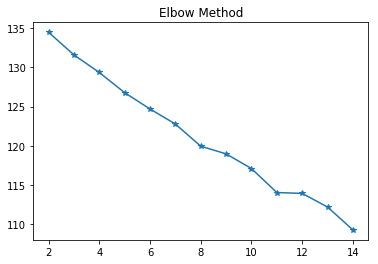

silhouette_score find best K:


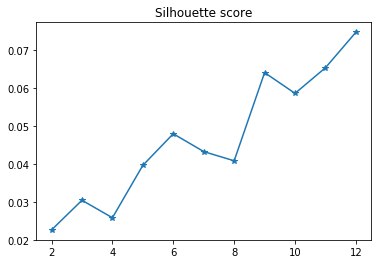

In [62]:
clusters = display_graph_elbow_method(X_trans)
best_k = display_silhouette_score(X_trans, clusters)


Base on elbow method, the elbow is somewhere between 11 and 12.

The silhouette socre indicate 12 is best K, therefore, the optimal K is 12 for clustering. Therefore the optimal K is set as 12 for clustering

In [63]:
# K-means clustering using LSA-transformed X
svd_kmeans = KMeans(n_clusters = 12, random_state= 42).fit(X_trans)

# transform cluster centers back to original feature space for visualisation
original_space_centroids = svd.inverse_transform(svd_kmeans.cluster_centers_)


# visualisation
visualise_text_cluster(svd_kmeans.n_clusters, original_space_centroids, tfidf_vec.get_feature_names(), num_word = 15)

Top terms for cluster 0: moya, davis, davis cup, roddick, cup, spain, clay, 7, beat, seville, 
Top terms for cluster 1: ball, wicket, vaughan, england, day, strauss, run, four, south, test, 
Top terms for cluster 2: drug, collins, balco, ban, pound, medal, conte, dope, jones, laboratory, 
Top terms for cluster 3: liverpool, benitez, gerrard, newcastle, want, morientes, souness, bid, club, anfield, 
Top terms for cluster 4: indoor, world, olympic, record, champion, 60m, race, birmingham, gold, world record, 
Top terms for cluster 5: 6, open, 7, hewitt, federer, australian, agassi, set, final, 3, 
Top terms for cluster 6: athletics, greek, iaaf, athens, kenteris, test, thanou, athlete, drug, walker, 
Top terms for cluster 7: club, player, team, cricket, arsenal, get, would, chelsea, cup, think, 
Top terms for cluster 8: connor, horgan, arcy, ireland, easterby, wing, driscoll, maggs, shane horgan, dempsey, 
Top terms for cluster 9: double, mixed double, mixed, hopman cup, hopman, single, 

#### 7. State how many clusters are generated? Name each cluster meaningfully according to the terms that appear in the clusters?

There are 12 clusters generated by singular value decomposition.

Cluster 0: Davis Cup Tennis

With terms `davis`, `davis cup`, `moya`, `roddick` and `spain`, this cluster is about David Cup Tennis Game.

Cluster 1: England Wicket

With terms `wicket`, `ball`, `test`, and name `vaughan` and `strauss`, this cluster is about wicket test

Cluster 2: Player Drug Bans

With terms `drug`, `ban`, `laboratory`,`balco` and player name `collins`, this cluster is about player Drug bans

Cluster 3: Premier League Games

Containing terms such as football teams in premier league: `liverpool` and `newcastle` . Also the player and coach names like `benitez`,`gerrard`,`morientes` and `souness`. This cluster is about premier league games.

Cluster 4: Olympic Word Record

With terms `olympic`, `record`, `champion`, `world record` and `race`, this cluster is about Olympic word record

Cluster 5: Australian Open Tennis

With terms `australian`,`open`,`final `,and player name `federer`,`hewitt`, this cluster is about Australian Open Tennis

Cluster 6: Running Competition

With terms `athens`,`greek`,` athletics` and runner name `kenteris` and `thanou`, this cluster is about Running Competition 

Cluster 7: Cricket Game

With team name`arsenal` and `chelsea`, term `cricket` and `cup`, this cluster is about cricket Game

Cluster 8: European Rugby

With names `connor`, `driscoll`,`arcy`, and `shane horgan`, this cluster is about European Rugby

Cluster 9: Hardcourt Tennis Tournament

With Terms `hopman cup`, `mixed double`,`match`,`cup` and `Australian`, this cluster is about 
Australian mixed gender tennis tournament

Cluster 10: Marathon Race

This cluster is fousing on olympic marathon race since it contains `marathon`, `radcliffe`,`cross country` and `chepkemei`.

Cluster 11:Six Nations Rugby Union

With terms `england`, `wale`,`ireland`,`scotland`,`italy`,`france` and `six nation`, this cluster is about annual Six National Rugby Union competition

#### 8. Identify the first fifteen high frequent terms (that are not stopwords or noise) in the start list?

Order_terms from Q3 does not contain stopwords and use tfidf_vec to filter noise words. 

In [65]:
svdTerms = []
for term in order_terms:
    if term['term'] in tfidf_vec.get_feature_names():
        svdTerms.append(term)
        
for i, term in enumerate(svdTerms[0:20]):
    print(str(i + 1) + ")\tTerm:", term['term'], "\tFrequency:", term['tf'])

1)	Term: england 	Frequency: 199
2)	Term: first 	Frequency: 185
3)	Term: world 	Frequency: 180
4)	Term: get 	Frequency: 175
5)	Term: player 	Frequency: 164
6)	Term: would 	Frequency: 156
7)	Term: back 	Frequency: 149
8)	Term: come 	Frequency: 146
9)	Term: team 	Frequency: 144
10)	Term: last 	Frequency: 143
11)	Term: match 	Frequency: 133
12)	Term: second 	Frequency: 132
13)	Term: set 	Frequency: 131
14)	Term: 6 	Frequency: 130
15)	Term: give 	Frequency: 126
16)	Term: day 	Frequency: 126
17)	Term: open 	Frequency: 126
18)	Term: final 	Frequency: 120
19)	Term: new 	Frequency: 116
20)	Term: want 	Frequency: 113


Top 15 high frequent terms:

1. england
2. first 	
3. world
4. get
5. player
6. would
7. back
8. come
9. team
10. last
11. match
12. second
13. set
14. give
15. day

#### 9. Describe how these clusters can be useful in the online personalised news story service planned by the news corporation.

These Clusters can be useful in the online personalised news story. Base on previous cluster results, the dataset is mainly sports news story. This may be a result of a biased datasaet, but it does not mean the observation are invalid. The clusters discover useful information in personalised news story.

The clusters recognized different sports and evenly split. Sports like cricket, tennis, rugby, football and race are represented in different clusters. The implication is that an even coverage of popular sports is necessary, because each popular sports area has many audiences. If company only foucs on a singular sport will decrease the audience.

Also, the clusters focus on the high level of the sports like Australian Open, Six Nations Rugby Union, Premier League Games. The implication is that people are most interested in high level sports or competitions.

Therefore, the company can recommend related news to users who are in similar clusters. Also, the company should proivde popular news and high level competitions' new to users.

### Part 4: Web Mining the Log Data for a Website

### 1.0 Sequential Rule Mining

#### a. Rationale behind selecting the method.

Sequential rule mining can discover patterns in sequences such as a page followed by another page by the vistoers browing pages step by step. It allows web owner to discover relations between pages. By using this approach, web owners can also predict visitors browsing patterns and build a better websites structure.

In [65]:
import pandas as pd

df = pd.read_csv('web_log_data.csv')

df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5866 entries, 0 to 5865
Data columns (total 6 columns):
ip           5866 non-null object
date_time    5866 non-null object
request      5866 non-null object
step         5866 non-null int64
session      5866 non-null int64
user_id      5866 non-null int64
dtypes: int64(3), object(3)
memory usage: 275.0+ KB


,ip,date_time,request,step,session,user_id
0,c210-49-32-6.rochd2.,18/Apr/2005:21:25:07,/,1,3,3
1,visp.inabox.telstra.,19/Apr/2005:08:24:28,/,1,12,12
2,dsl-61-95-54-84.requ,19/Apr/2005:08:33:01,/,1,13,13
3,d220-236-91-52.dsl.n,19/Apr/2005:09:16:06,/,1,15,15
4,allptrs.eq.edu.au,19/Apr/2005:09:47:54,/,1,22,22
5,cpe-144-136-135-38.q,19/Apr/2005:10:13:37,/,1,23,23
6,225-145-222-203.rev.,19/Apr/2005:11:48:32,/,1,25,25
7,cpe-138-130-198-54.q,19/Apr/2005:12:31:54,/,1,26,26
8,203-219-44-170-qld.t,19/Apr/2005:12:33:49,/,1,29,29
9,cpe-138-130-198-54.q,19/Apr/2005:12:42:51,/,1,30,30


In [66]:
# convert date_time into datafreame format
df['date_time'] = pd.to_datetime(df['date_time'], format="%d/%b/%Y:%H:%M:%S")  

df.head(10)

,ip,date_time,request,step,session,user_id
0,c210-49-32-6.rochd2.,2005-04-18 21:25:07,/,1,3,3
1,visp.inabox.telstra.,2005-04-19 08:24:28,/,1,12,12
2,dsl-61-95-54-84.requ,2005-04-19 08:33:01,/,1,13,13
3,d220-236-91-52.dsl.n,2005-04-19 09:16:06,/,1,15,15
4,allptrs.eq.edu.au,2005-04-19 09:47:54,/,1,22,22
5,cpe-144-136-135-38.q,2005-04-19 10:13:37,/,1,23,23
6,225-145-222-203.rev.,2005-04-19 11:48:32,/,1,25,25
7,cpe-138-130-198-54.q,2005-04-19 12:31:54,/,1,26,26
8,203-219-44-170-qld.t,2005-04-19 12:33:49,/,1,29,29
9,cpe-138-130-198-54.q,2005-04-19 12:42:51,/,1,30,30


#### b. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.

<table>
    <tr>
        <th>Variable Name</th>
        <th>Role</th>
        <th>Measurement Level</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>request</td>
        <td>Target</td>
        <td>Norminal</td>
        <td> request sent by the user</td>
    </tr>
    <tr>
        <td>step</td>
        <td>Sequence Order</td>
        <td>Ordinal</td>
        <td>Ordered request made by the user</td>
    </tr>
    <tr>
        <td>user_id</td>
        <td>ID</td>
        <td>Norminal</td>
        <td>User ID</td>
    </tr>
</table>

As can be seen from the table. Only three variables were include in the analysis. Different from association mining, to get sequential reules, there must be information of order of the target. In this dataset, the order is given in `step` column. Using column `user_id` to identify different users and group one user's request to discover users browsing patterns.

#### c. Can you identify data quality issues in order to perform web mining?

In [67]:
df['request'].value_counts()

/                                                                821
/favicon.ico                                                     554
/robots.txt                                                      395
/eaglefarm/javascript/menu.js                                    370
/eaglefarm/pdf/Web_Price_List.pdf                                296
/eaglefarm/                                                      286
/services.html                                                   244
/eaglefarm/pricelist/                                            189
/eaglefarm/pricelist                                             187
/more.html                                                       145
/direct.html                                                     107
/eaglefarm/specials/                                             103
/eaglefarm/contact                                                95
/eaglefarm/contact/                                               93
/eaglefarm                        

Although the dataset was removed unproductive items from the log file such as graphics, sound etc, it can be found that Javascript(.js), Cascading Style Sheets (.css) and Icon (.ico) were not removed. Therefore, these unproductive items will be removed

Also, cells contains .txt and . pdf in `request` column will be removed.

There are many '/' requests which will be removed since it doeesn't has useful information.

Also, there are many `requst` are same except ending with a '/' .

Therefore, if the cell only has a '/', it will be removed. Also, the ending with a '/' will be removed.



In [68]:
import re
import numpy as np
#remove ending '/' and remove rows only has '/'
def strip_removed(data):
    string  = data['request']
    string = string.strip('/')
    string = '/' + string
    data['request'] = string

    return data

df = df.apply(strip_removed, axis = 1)
df = df[~df['request'].isin(['/'])]

df['request'].value_counts()

/favicon.ico                                                     554
/robots.txt                                                      395
/eaglefarm                                                       378
/eaglefarm/pricelist                                             376
/eaglefarm/javascript/menu.js                                    370
/eaglefarm/pdf/Web_Price_List.pdf                                296
/services.html                                                   244
/eaglefarm/contact                                               188
/eaglefarm/specials                                              174
/richlands                                                       169
/more.html                                                       145
/richlands/contact                                               126
/direct.html                                                     107
/eaglefarm/fileupload                                             84
/eaglefarm/default.htm            

In [69]:
#create mask for filtering .js .css .ico .txt .pdf

mask = mask = (df['request'].str.endswith('.js') | df['request'].str.endswith('.css') | df['request'].str.endswith('.ico')
              | df['request'].str.endswith('.txt') | df['request'].str.endswith('.pdf'))
print("Rows before:", len(df))

# invert the mask, only keep records without .js, .css .ico and .txt in the request column
df = df[~mask]
print("After removal", len(df))

df['request'].value_counts()

Rows before: 5045
After removal 3323


/eaglefarm                                                       378
/eaglefarm/pricelist                                             376
/services.html                                                   244
/eaglefarm/contact                                               188
/eaglefarm/specials                                              174
/richlands                                                       169
/more.html                                                       145
/richlands/contact                                               126
/direct.html                                                     107
/eaglefarm/fileupload                                             84
/eaglefarm/default.htm                                            81
/index.html                                                       79
/whoare.html                                                      76
/richlands/services/printing                                      72
/guarantee.html                   

#### d. Discuss the results obtained. Discuss also the applicability of findings of the method. Should include a high-level managerial kind of discussion on the findings, should not be just interpretation of results as shown in results panel.

Sorting dataframe based on step and group by `user_id` and remove list that only has one request

In [70]:
df_seq = df[['request', 'step','user_id']]

df_seq = df_seq.sort_values(by = ['step'])

transcations = df_seq.groupby(['user_id'])['request'].apply(list)

sequences = transcations.values.tolist()

# remove the lists that only have one request 
sequences = [x for x in sequences if len(x) != 1]
# show the first 5 sequences
print(sequences[:5])

[['/services.html', '/more.html', '/guarantee.html'], ['/richlands', '/richlands', '/richlands/fileupload', '/richlands/fileupload'], ['/richlands/contact', '/richlands/services/printing', '/eaglefarm', '/richlands', '/eaglefarm/specials'], ['/cgi-bin/FormMail.pl', '/richlands/fileupload/upload.htm', '/richlands', '/richlands/fileupload', '/cgi-bin/FormMail.pl', '/richlands/fileupload/upload.htm'], ['/richlands/contact', '/richlands/services/printing', '/eaglefarm', '/richlands']]


In [71]:
from collections import defaultdict
import subprocess
import re


''' Uses SPMF to find association rules in supplied transactions '''
def get_association_rules(sequences, min_sup, min_conf):
    # step 1: create required input for SPMF
    
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf.jar', 'run', 'RuleGrowth', 'seq_rule_input.txt', 'seq_rule_output.txt', '10%', '10%'], shell =True)
    
    # read back the output rules
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

Using `min_supp` of 0.1 and `min_conf` of 0.1

In [72]:
get_association_rules(sequences,0.1,0.1)

,Left_rule,Right_rule,Support,Confidence
0,[/services.html],[/more.html],0.308917,0.498715
1,[/services.html],"[/more.html, /guarantee.html]",0.143312,0.231362
2,[/services.html],[/guarantee.html],0.176752,0.285347
3,[/eaglefarm/specials],[/eaglefarm/contact],0.226115,0.651376


30.89% of visitors who view `[/services.html]` also view `[/more.html]`. 49.87% of visitors who visit `[/more.html]` after viewing `[/services.html]`

17.6% of visitors who view `[/services.html]` also view `[/guarantee.html]` page. 28.53% of visitors who visit `[/guarantee.html]` after viewing `[/services.html]`.

Rule 3 is a strong rule.22.6% of visitors who view `[/eaglefarm/specials]` also view `[/eaglefarm/contact]` page. 65.13% of visitors who visit `[/eaglefarm/contact]` after viewing `[/eaglefarm/specials]`.

Overall, visitors are interesting in `[/services]` and have considered about service's guarantee. So, many visitors click `[/more.html]` and `[/guarantee.html]` after visited `[/services.html]`. Also, `[/eaglefarm/contact]` has strong connection with `[/eaglefarm/specials]`. This means visitor are looking for contacts to reach eaglefarm specials.

### 2.0 Clustering

#### a. Rationale behind selecting the method.

Using Clustering appoarch, web owners can understand different types of users behaviour and frequency of the usage on the websites.

#### b. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.

<table>
    <tr>
        <th>Variable Name</th>
        <th>Role</th>
        <th>Measurement Level</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>request</td>
        <td>Feature</td>
        <td>Norminal</td>
        <td> request sent by the user</td>
    </tr>
    <tr>
        <td>session</td>
        <td>Feature</td>
        <td>Numeric</td>
        <td>to assess the behavior based on the browing session</td>
    </tr>
</table>

#### c. Can you identify data quality issues in order to perform web mining?

Same data quality issues mentioned before in 1.3

1. Remove rows contains .ico .js .css and .txt
2. Remove last '/'

#### d. Discuss the results obtained. Discuss also the applicability of findings of the method. Should include a high-level managerial kind of discussion on the findings, should not be just interpretation of results as shown in results panel.

In [73]:
def create_access_column(access_log):
    
    log_list = []
    
    for i in access_log:
        log_list.extend(i)
    
    log_list = list(set(log_list))
    
    return log_list

def create_access_num(access_log):
        
    log_list = create_access_column(access_log)
    
    log_counts = pd.DataFrame([], columns = log_list)
    
    log_counts.columns
    log_count = []
    for i in access_log:
        log_count_tmp = []
        for k in log_counts.columns:
            tmp = 0;
            for j in i:
                if j == k:
                    tmp += 1            
            
            log_count_tmp.append(tmp)
        log_count.append(log_count_tmp)
        
    return log_count, log_list

In [74]:
#Determining K
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

def display_graph_elbow_method(data):
    clusters = []
    inertia_vals = []
       
    #Convert df to matrix
    X = data.as_matrix()
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    # list to save the clusters and cost
    for k in range(2, 15, 1):
        model = KMeans(n_clusters = k, random_state= 42)
        model.fit(X)
    
        clusters.append(model)
        inertia_vals.append(model.inertia_)
    
    
    print("elbow method find best K:")
    # plot the inertia vs K values
    plt.plot(range(2,15,1), inertia_vals, marker='*')
    plt.title("Elbow Method")
    plt.show()
    
    return X, clusters

def display_silhouette_score(X, clusters):
    silhouette_scores = {}
    for i in range(2, len(clusters), 1):
        score = silhouette_score(X, clusters[i].predict(X))
        silhouette_scores[i] = score
    
    optimal_k = max(silhouette_scores, key = silhouette_scores.get)    
    print("silhouette_score find best K:")
    plt.plot(range(2,len(clusters),1), list(silhouette_scores.values()), marker='*')
    plt.title("Silhouette score")
    plt.show()   
    
    #print("Optimal K value: " + str(optimal_k))    
    return optimal_k   


df_cluster = df.groupby(['session'])['request'].apply(list)

access_log_count, access_log_list = create_access_num(df_cluster)

access_log_count = pd.DataFrame(access_log_count, columns = access_log_list)

/Users/oliver/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/Users/oliver/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/oliver/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


elbow method find best K:


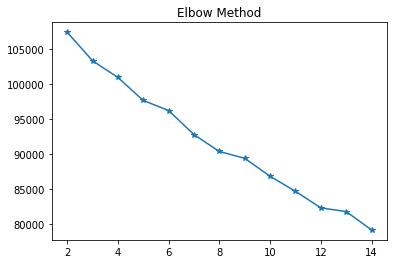

silhouette_score find best K:


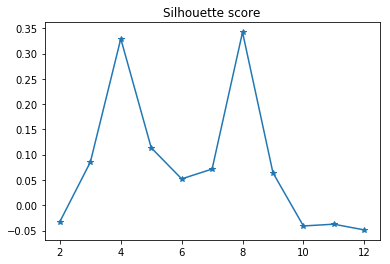

In [75]:
X, clusters = display_graph_elbow_method(access_log_count)
best_k = display_silhouette_score(X, clusters)

Base on elbow method, the elbow is somewhere between 8 and 9. The silhouette socre indicate 8 is best K, therefore, the optimal K is 8 for clustering. Therefore the optimal K is set as 8 for clustering. The clustering result will be based on the `request` and `session`.

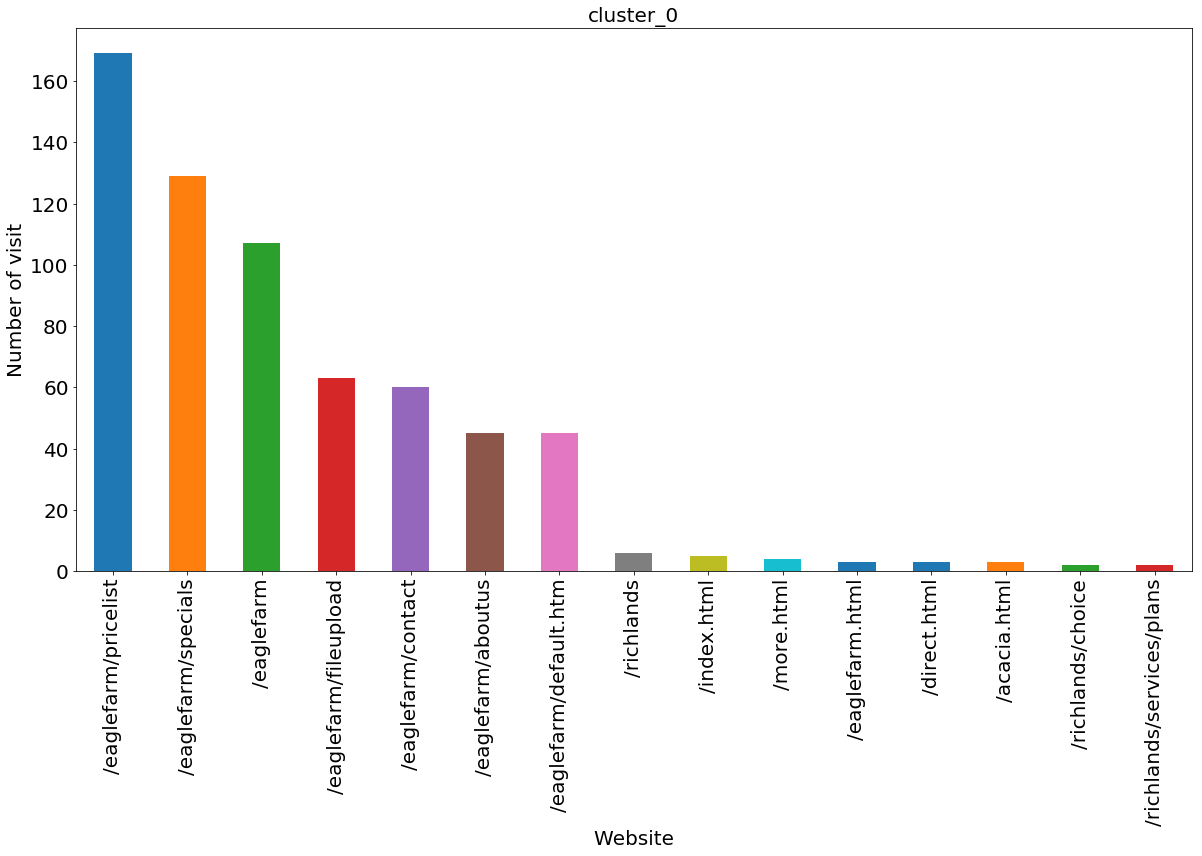

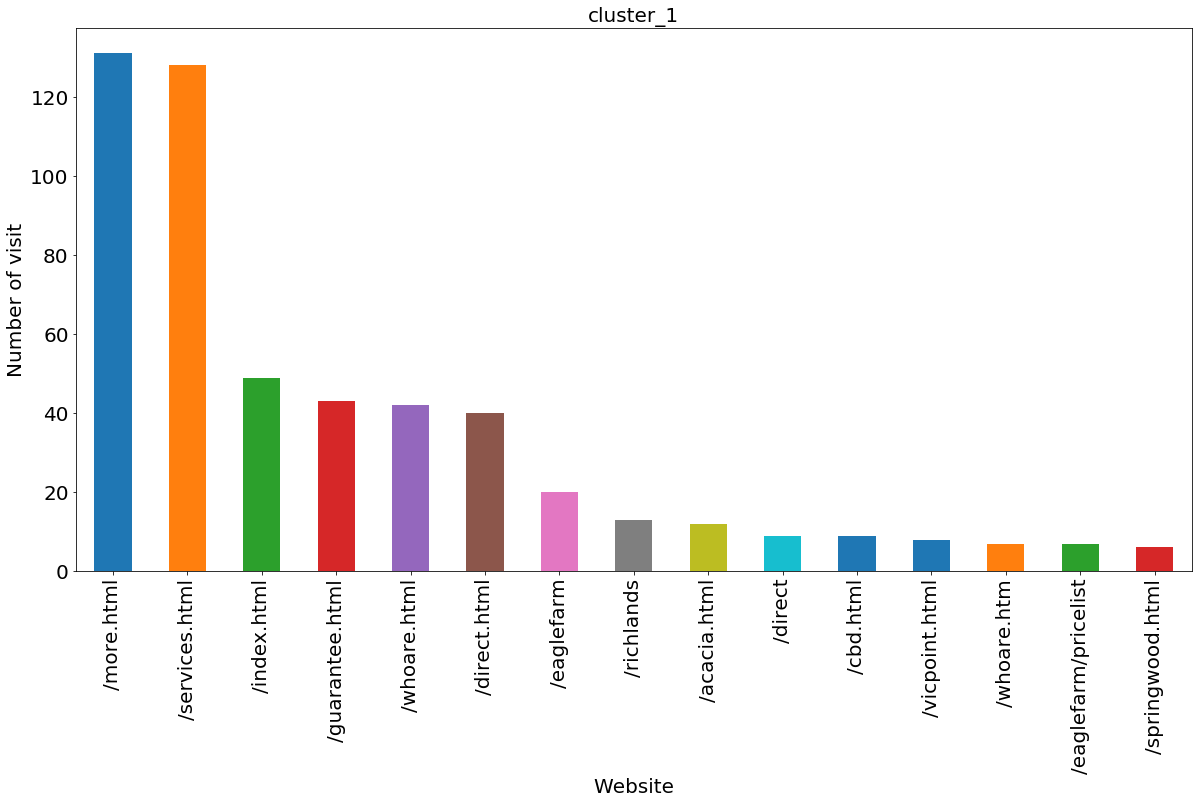

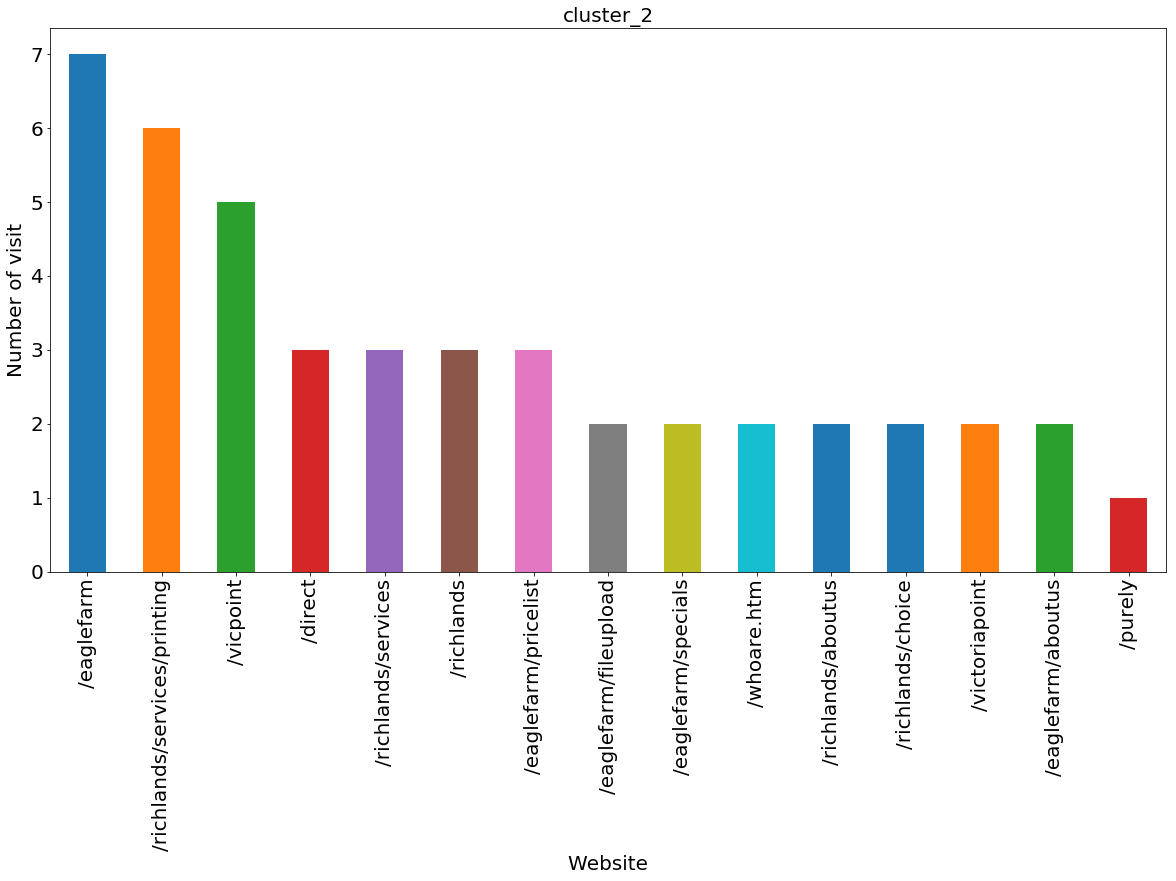

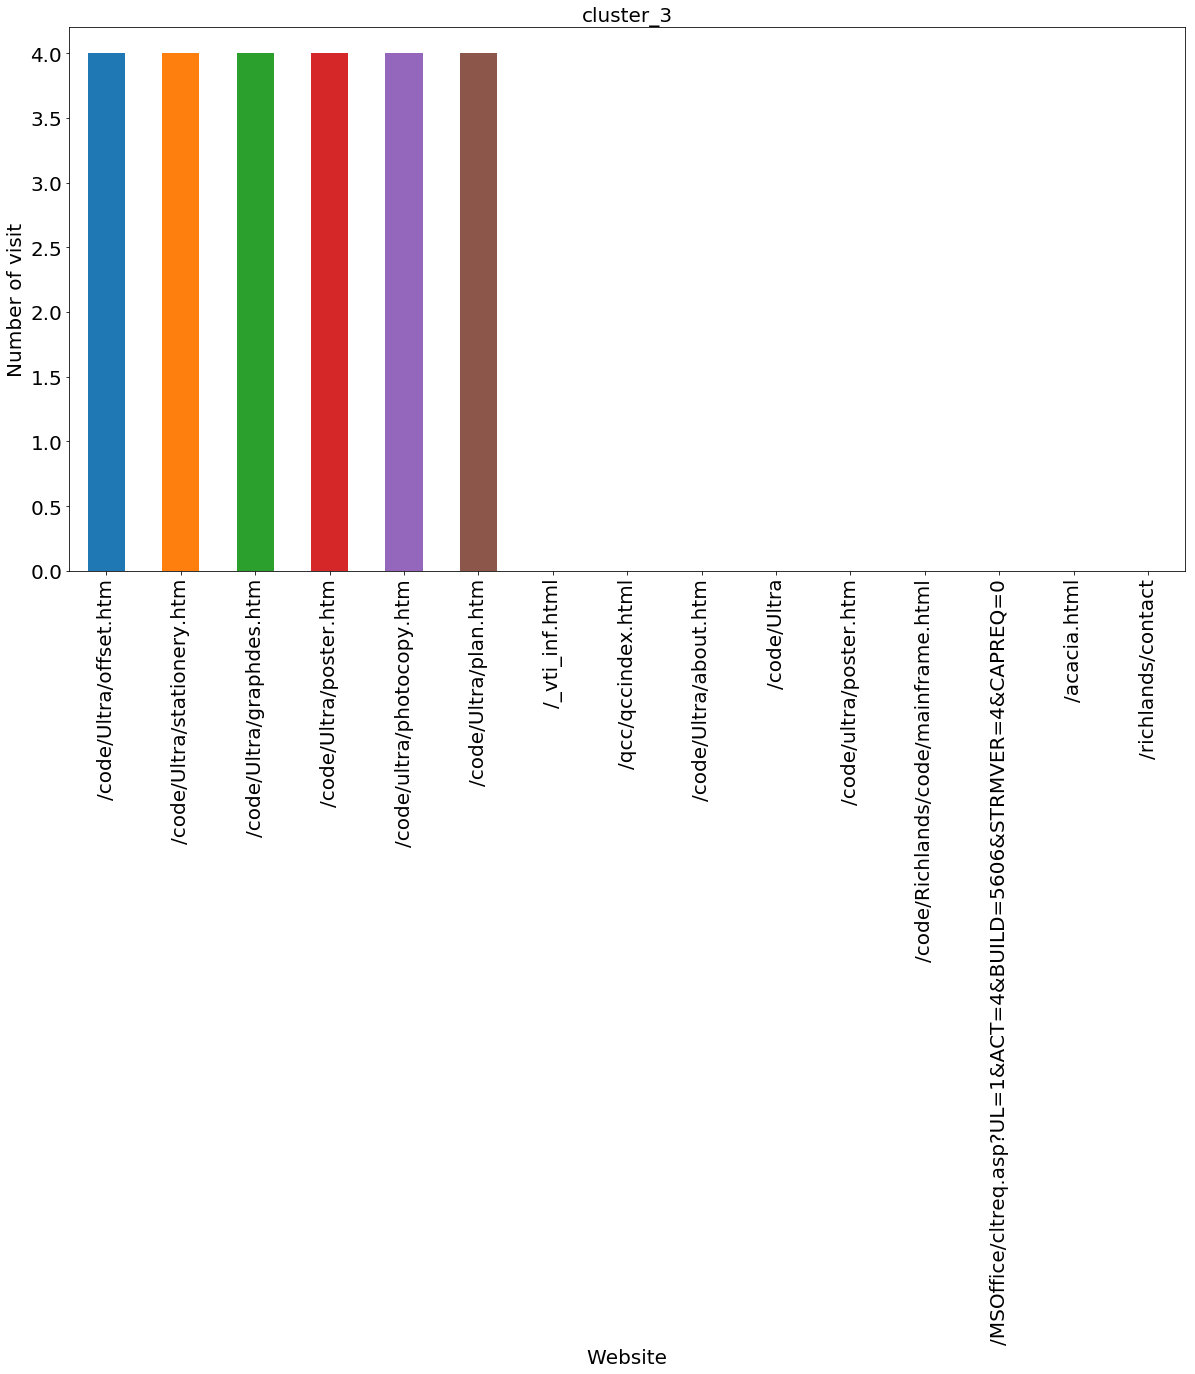

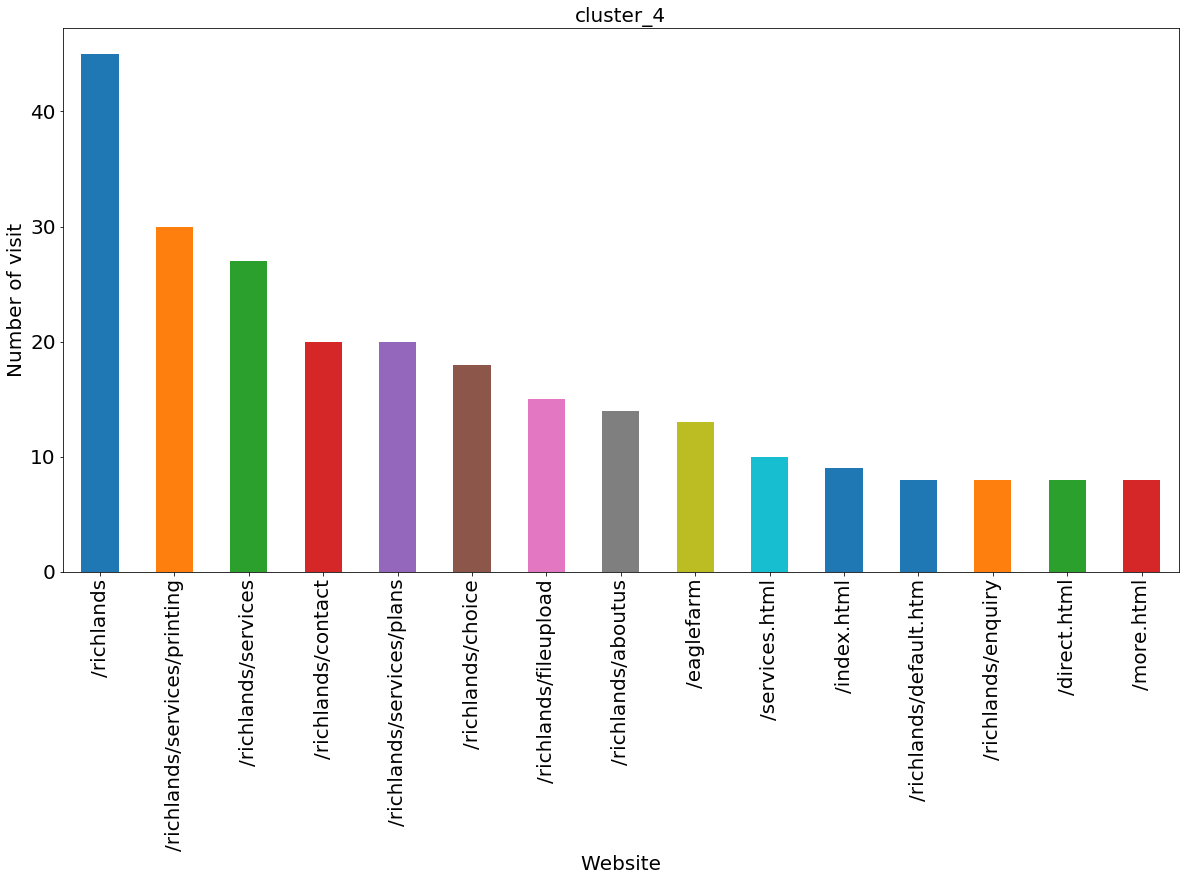

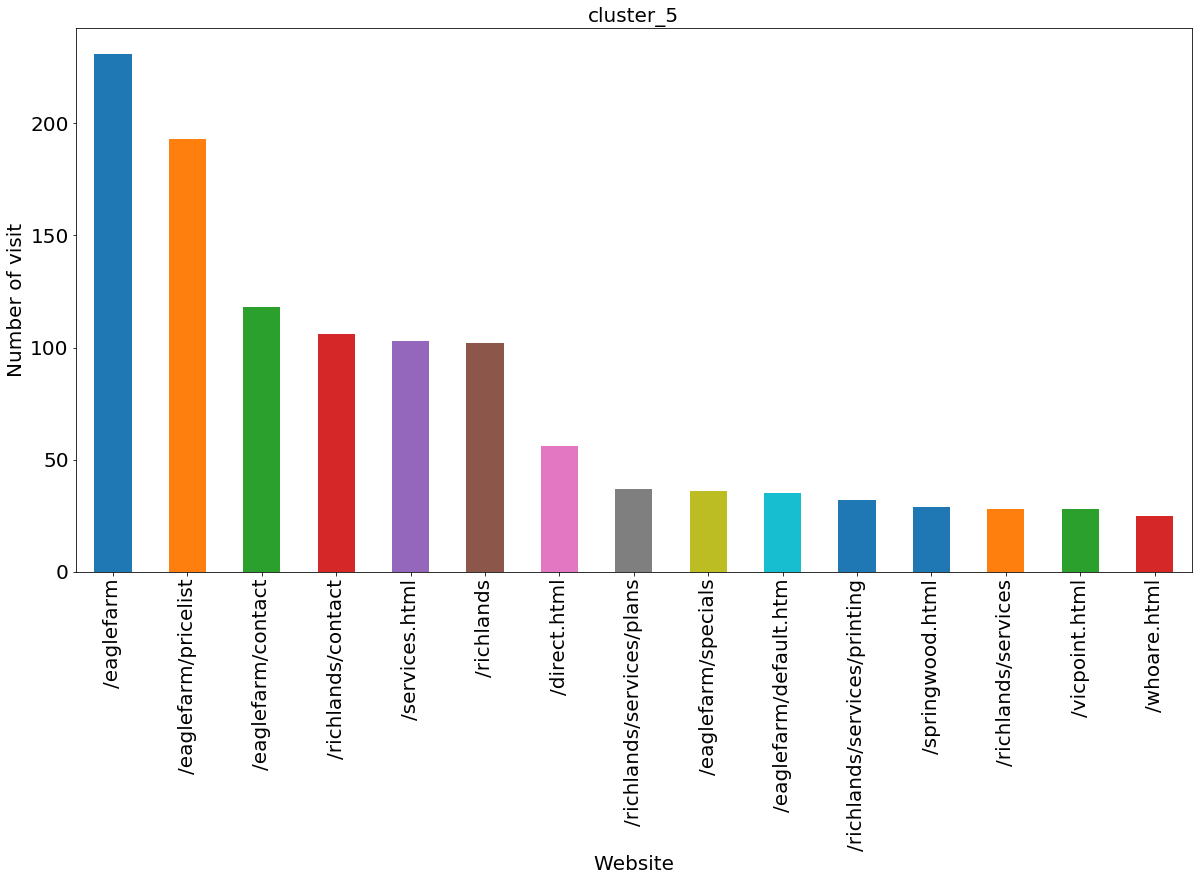

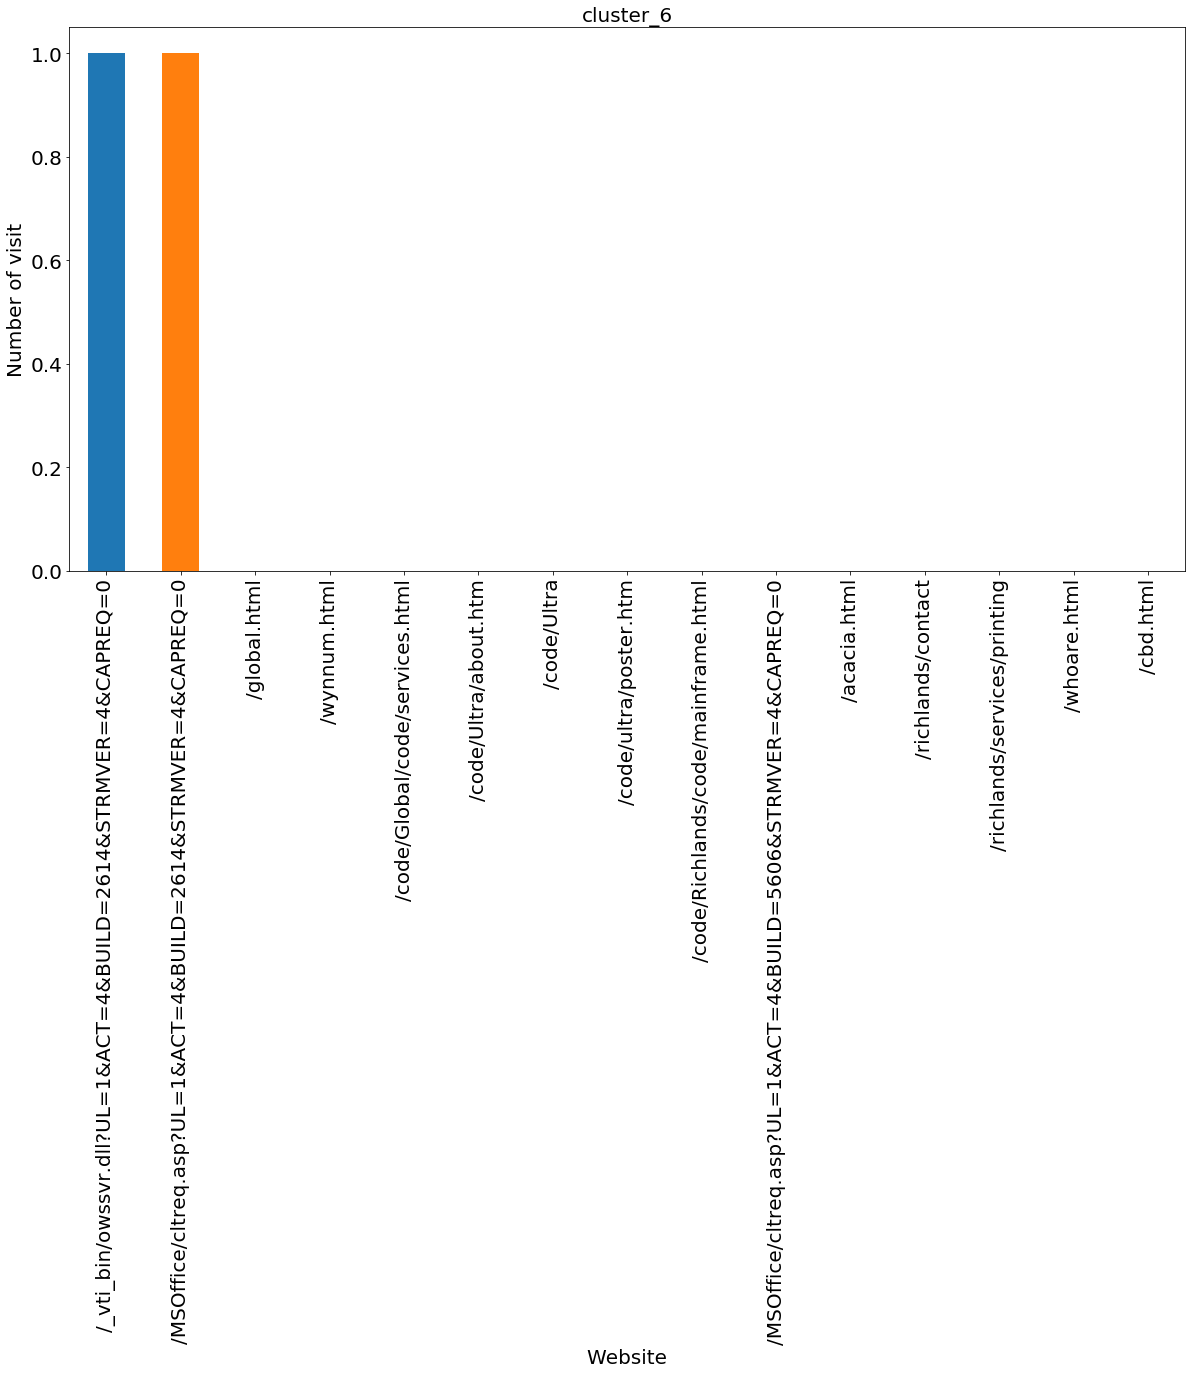

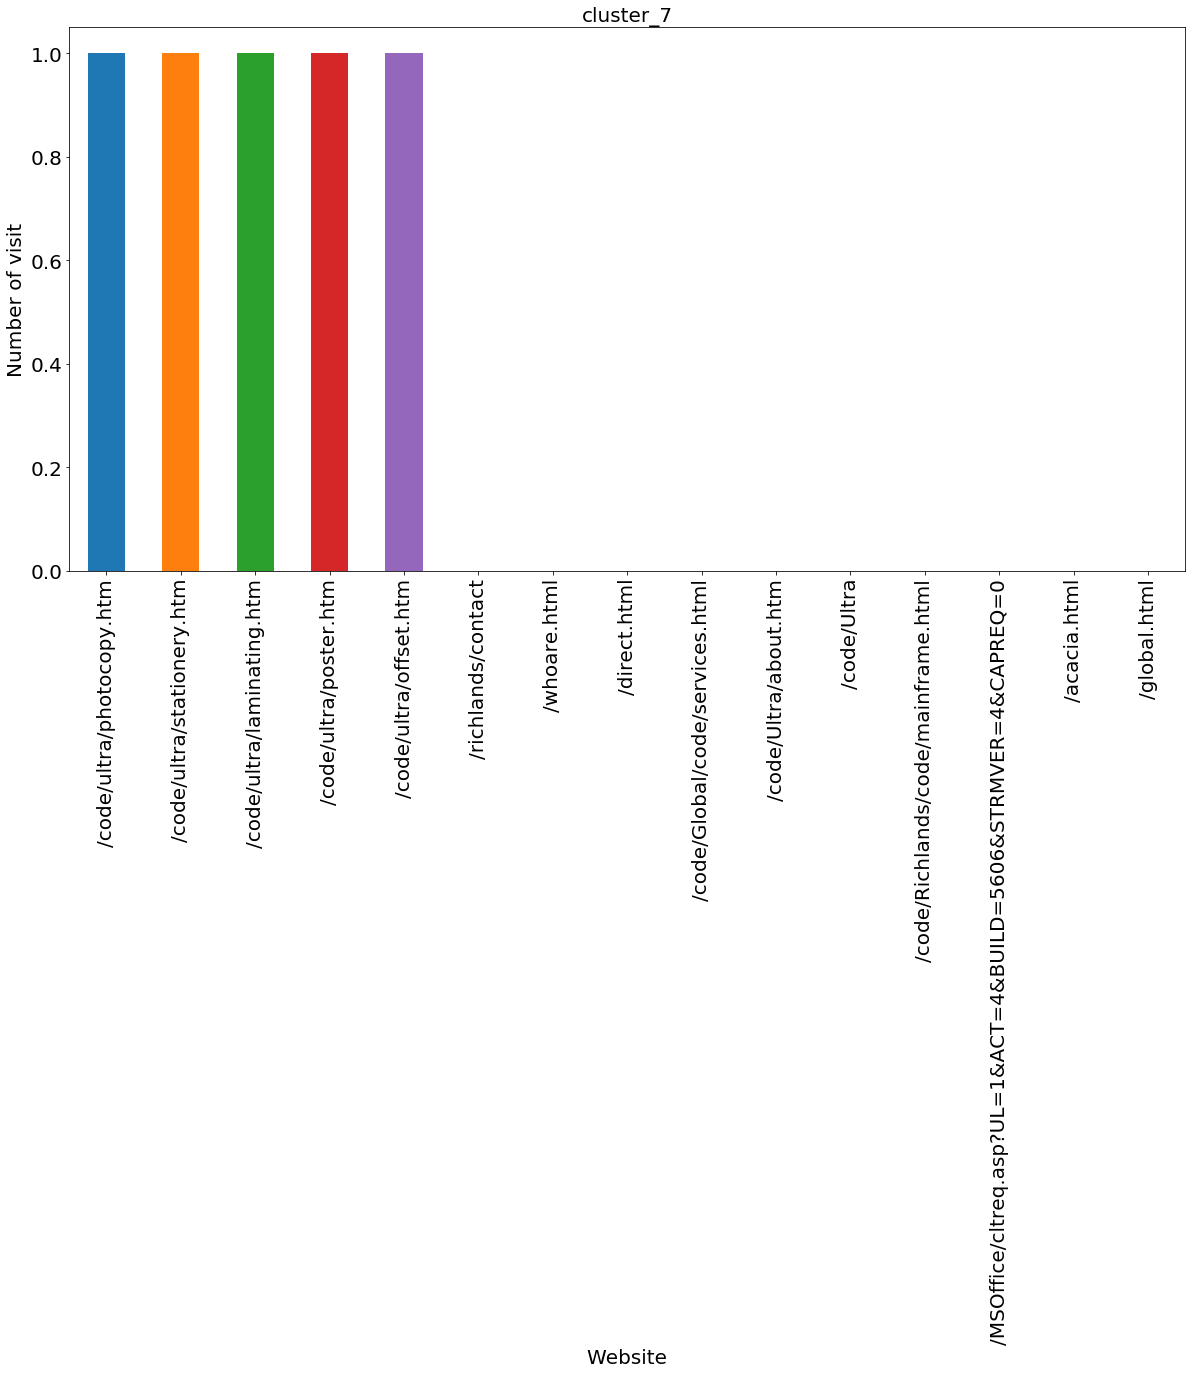

In [76]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 8, random_state = 42)
model.fit(X)

#giving label to dataset

access_log_count['cluster_id'] = model.predict(X)

access_log_count['cluster_id'].value_counts()

for i in sorted(access_log_count.cluster_id.unique()):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_for_displaying = access_log_count[access_log_count.cluster_id == i].drop(['cluster_id'], axis = 1)
    df = tmp_for_displaying.sum().T
    df = df.sort_values(ascending=False)
    df = df.head(15)

    df.plot(ax = ax, kind="bar", fontsize = 20)
    ax.set_xlabel('Website', fontsize = 20)
    ax.set_ylabel('Number of visit', fontsize = 20)
        
    plt.title("cluster_" + str(i), fontsize = 20)
    plt.show()
    


1. Cluster_0:  The behaviour of cluster 1 are likely to be the customers of eaglefarm. They often visit /eaglefarm/pricelist, /eaglefarm/specials,/eaglefarm and /eaglefarm/contact. These visitors were browsing website relate to eaglefarm.

2. Cluster_1:  The behaviour of cluster 1 are likely to be the new visitors. They were browsing more.html, service.html,more.html, guarantee.html and index.html. These visitors were browsing general information of the websites.

3. Cluster_4  The behaviour of cluster 4 are likely to be the the customers of richlands. They oftern visit /richlands, /richlands/services/printing, /richlands/services and /richlands/contact. These visitors were browsing webiste relate to richlands.


Ignored other clusters since there is too litte visits